# HEART ANALYSIS ANALYSIS AND PREDICTION

## 1. Introduction

A heart attack (myocardial infarction or MI) is a serious medical emergency in which the supply of blood to the heart is suddenly blocked, usually by a blood clot, as you can see in the below image:

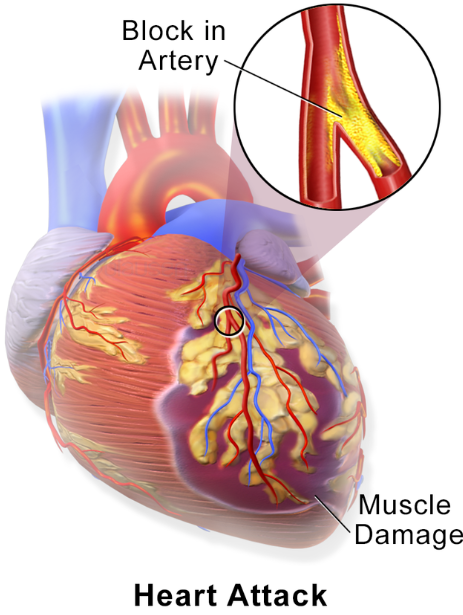

Symptoms of a heart attack can include:

- Chest pain – a feeling of pressure, heaviness, tightness or squeezing across your chest.
- Pain in other parts of the body – it can feel as if the pain is spreading from your chest to your arms, jaw, neck, back and tummy.
- Feeling lightheaded or dizzy.
- Sweating.
- Shortness of breath.
- Feeling sick (nausea) or being sick (vomiting).
- Feeling of anxiety (similar to a panic attack).
- Coughing or wheezing.


A lack of blood to the heart may seriously damage the heart muscle and can be life threatening. Therefore, it can be useful for doctors to have the patient's prediction or probability of a heart attack given its condition. In this way, they would be able to prevent heart attacks from happening and save lots of life. 

## 2. Dataset

For this project we used the dataset from Kaggle: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset


**Variable definitions in the Dataset**

- Age: Age of the patient
- Sex: Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp: Chest Pain type chest pain type
(Value 1: typical angina,
Value 2: atypical angina,
Value 3: non-anginal pain,
Value 4: asymptomatic)
- trtbps: resting blood pressure (in mm Hg)
- chol: cholestoral in mg/dl fetched via BMI sensor
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- _restecg: resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- target: 0= less chance of heart attack 1= more chance of heart attack



**Additional variable descriptions to help us**

- age - age in years
- sex - sex (1 = male; 0 = female)
- cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 2 = normal; 1 = fixed defect; 3 = reversable defect
- num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

## 3. Loading the dataset

In [177]:
#We first import the basic libraries that we will use

import numpy as np # linear algebra
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import os

In [178]:
df = pd.read_csv('C:\\Users\\Ihona\\Desktop\\Cursos\\ML_projects\\jupyter-example\\heart.csv')
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [179]:
#We change the columns headlines to not get confused:

new_columns = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df.columns = new_columns
df.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  slope  \
0   63    1   3     145   233    1         0      150      0      2.3      0   
1   37    1   2     130   250    0         1      187      0      3.5      0   
2   41    0   1     130   204    0         0      172      0      1.4      2   
3   56    1   1     120   236    0         1      178      0      0.8      2   
4   57    0   0     120   354    0         1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [180]:
print("Shape of Dataset:", df.shape) #Our dataset has 303 rows and 14 columns.

Shape of Dataset: (303, 14)


In [181]:
df.info() #We have non-null values and numerical values (Integer or float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 4. Data preparation

### 4.1. Examining missing values

Missing data creates a distorsion in the analysis and we can not train any model with missing data. Although we didn't obtain null values, we will discuss this situation. 

In [182]:
df.isnull().sum() #It gives for each variable a 0 if there is no null value. 


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [183]:
#We transform the last table into a more readable one

isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])



Total Missing Values
age                          0
sex                          0
cp                           0
trtbps                       0
chol                         0
fbs                          0
rest_ecg                     0
thalach                      0
exang                        0
oldpeak                      0
slope                        0
ca                           0
thal                         0
target                       0

In [184]:
import missingno
missingno.bar(df, color = "b")
plt.show()  #The graph is full because there is no missing data

ModuleNotFoundError: No module named 'missingno'

### 4.2. Examining unique values

It can help to identify whether the variable has categorical or a numerical values.

In [185]:
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [186]:
df["cp"].value_counts().count()  #It counts the different values it has a variable

4

In [187]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])


Total Unique Values
age                        41
sex                         2
cp                          4
trtbps                     49
chol                      152
fbs                         2
rest_ecg                    3
thalach                    91
exang                       2
oldpeak                    40
slope                       3
ca                          5
thal                        4
target                      2

The variables that have lower total unique values are categorical (qualitative) and the rest numerical (quantitative). 
In this context:
- Numeric Variables: “age”, “trtbps”, “chol”, “thalach” and “oldpeak ”
- Categorical Variables: "sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"

In [188]:
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

### 4.3. Examining statistics of variables

In [189]:
# We applied the "Describe" method to see the basic statistics of numerical data
df[numeric_var].describe()

age      trtbps        chol     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000

We want to make the data suitable and similar to the normal distribution before inserting it in the machine learning algorithm.

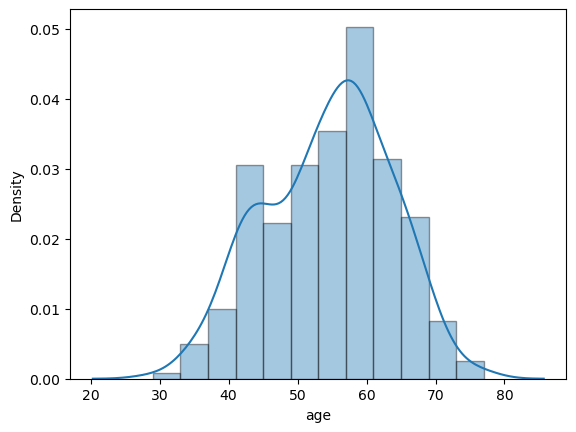

In [190]:
# "age" variable
sns.distplot(df["age"], hist_kws = dict(linewidth = 1, edgecolor = "k"));  #It looks like a normal distribution

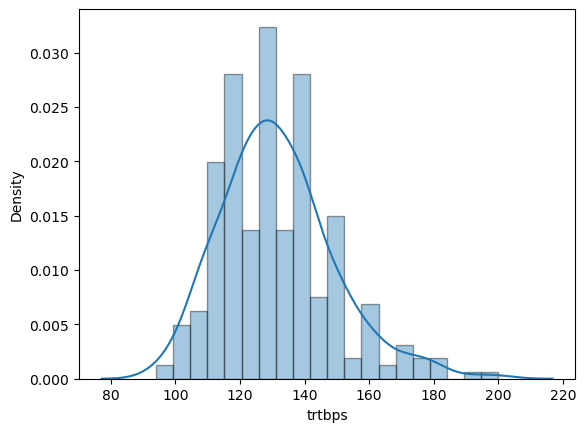

In [191]:
# "trtbps" variable
sns.distplot(df["trtbps"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20); #bins=20, data will be displayed with 20 bars

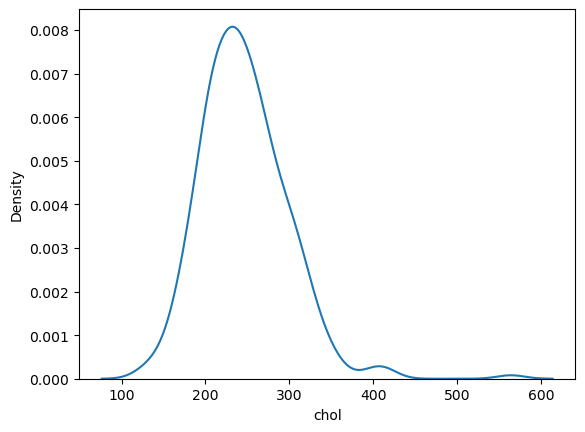

In [192]:
# "chol" variable
sns.distplot(df["chol"], hist = False);

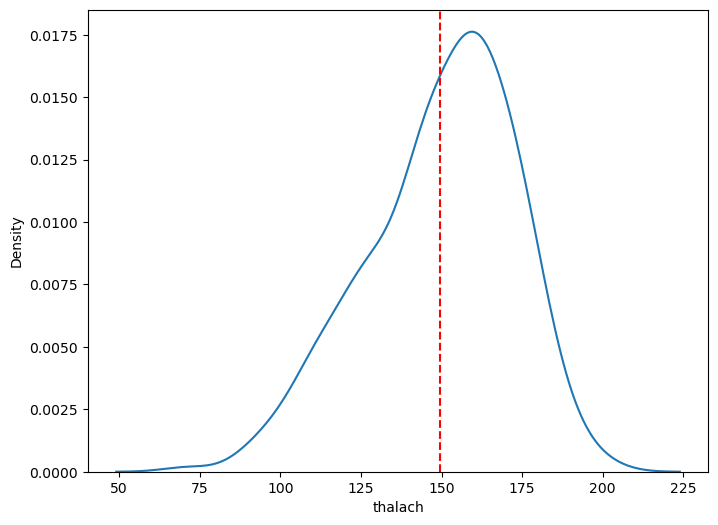

In [193]:
# "thalach" variable
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["thalach"], hist = False, ax = y)
y.axvline(df["thalach"].mean(), color = "r", ls = "--"); #The red line is the average of the data

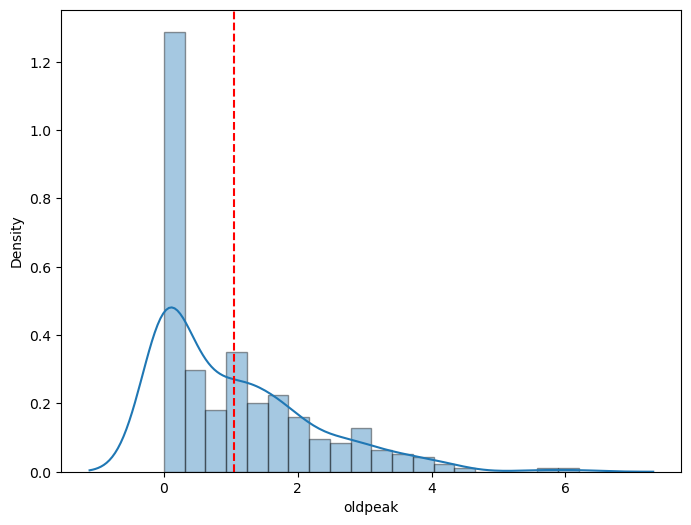

In [194]:
# "oldpeak" variable
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["oldpeak"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20, ax = y)
y.axvline(df["oldpeak"].mean(), color = "r", ls = "--");

## 5. Exploratory Data Analysis (Univariate analysis)

### 5.1. Numerical variables

In [195]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [196]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", "Cholesterol", "Maximum Heart Rate Achieved", "ST Depression"]

In [197]:
list(zip(numeric_var, numeric_axis_name)) #Now both lists appear linked in order


[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalach', 'Maximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

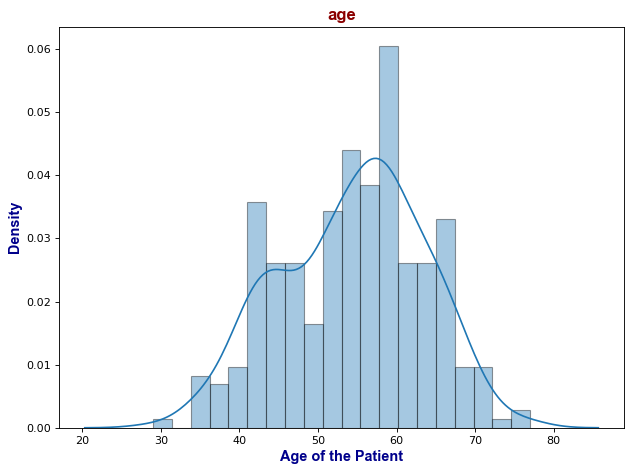

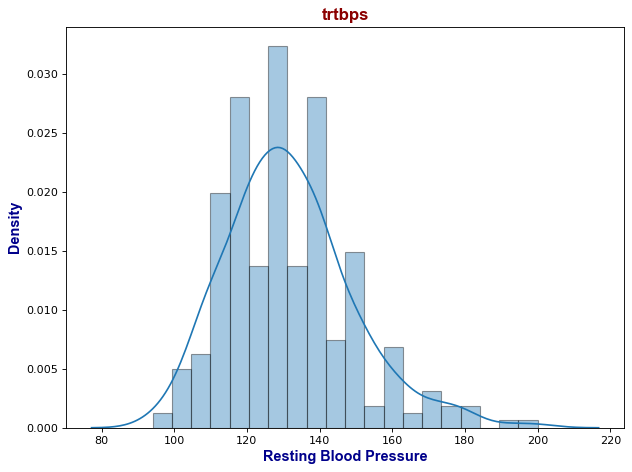

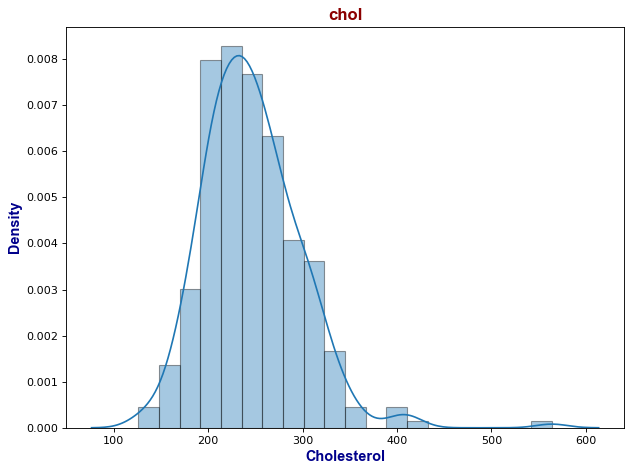

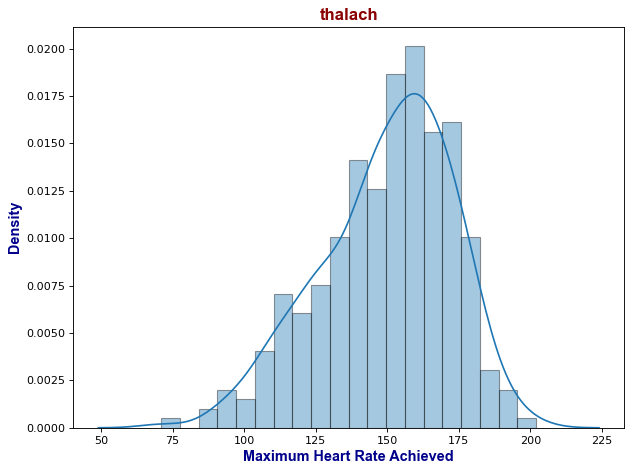

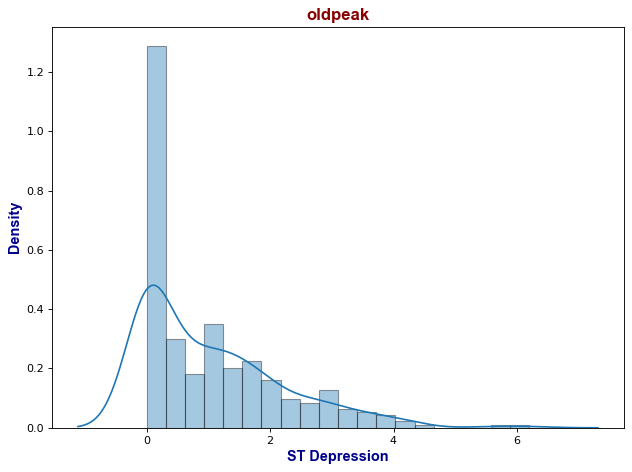

In [198]:
#Analysis with distplot:


title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

This analysis helps to detect outliers (if their density differs a lot from the mean, they could be outliers).

### 5.2. Categoric variables

In [199]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [200]:
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thal", "Target"]

In [201]:
list(zip(categoric_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

In [202]:
df["cp"].value_counts() #The first columns are the values that appear and the second the frequency of those values

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [203]:
list(df["cp"].value_counts().index)

[0, 2, 1, 3]

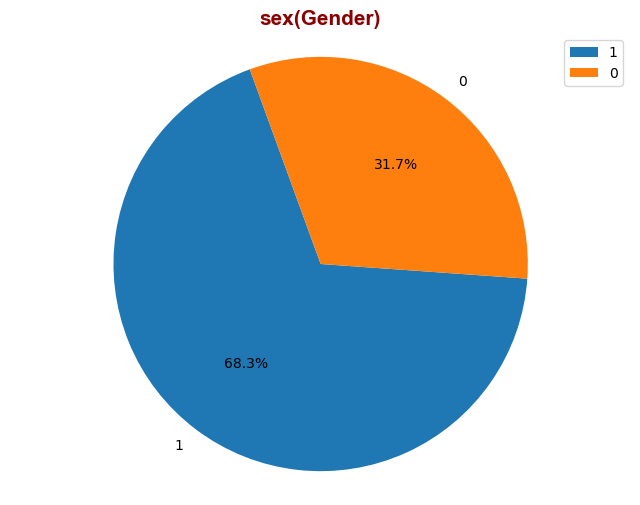

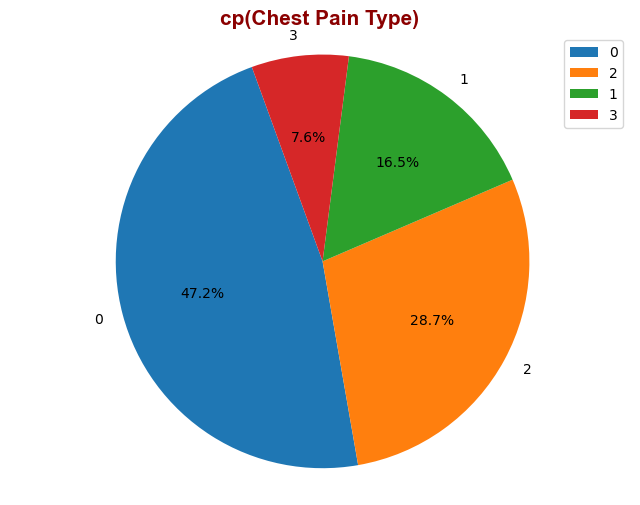

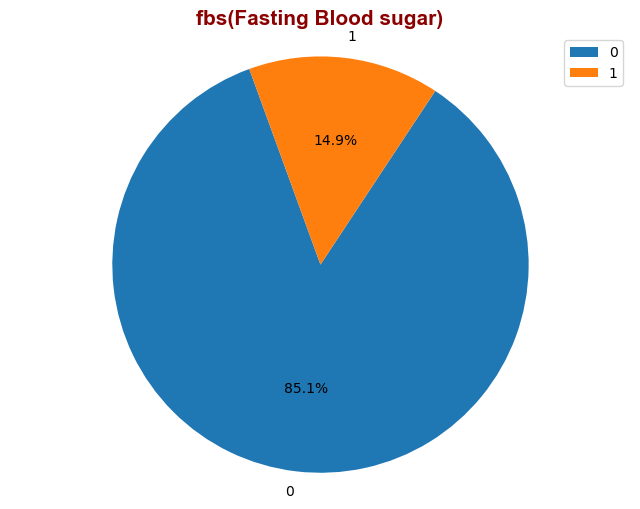

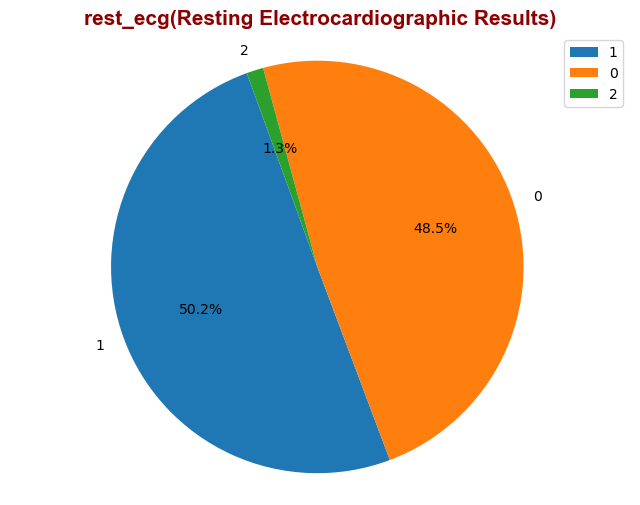

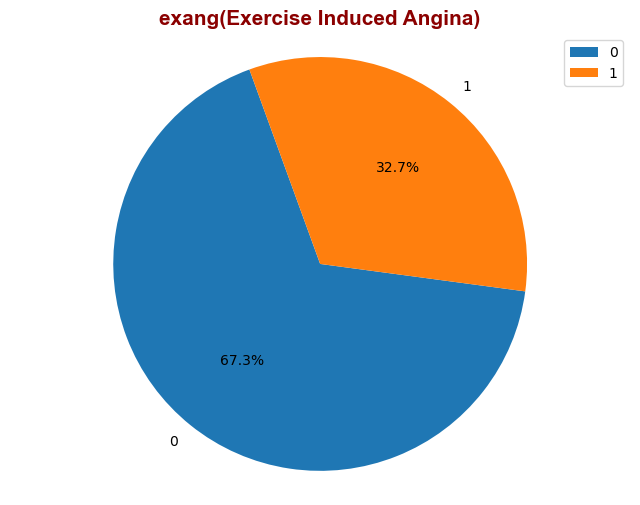

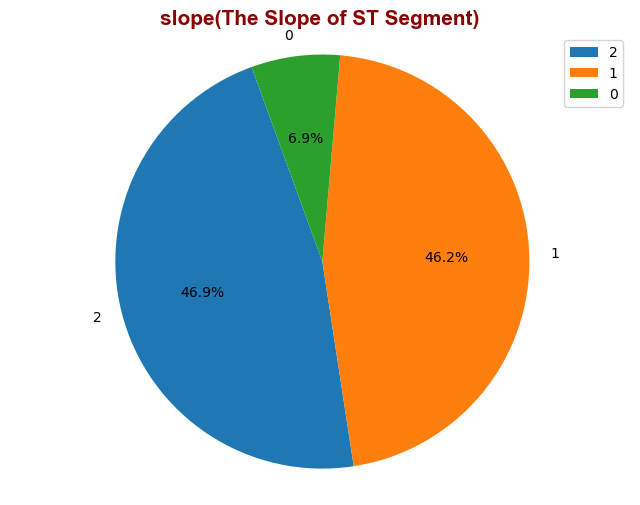

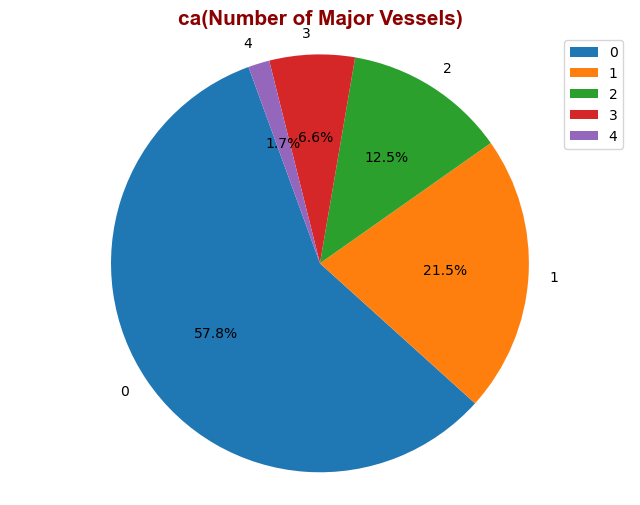

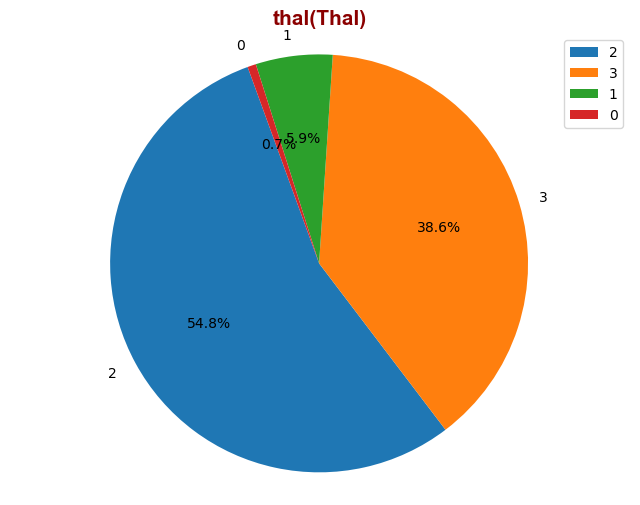

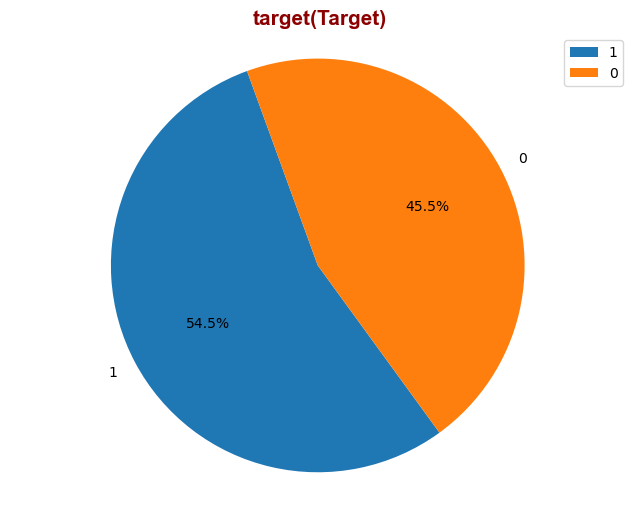

In [204]:
#Analysis with Pie Chart

title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8, 6))
    
    observation_values = list(df[i].value_counts().index)  #i referrs to the first variable of the zip: "categoric_var"
    total_observation_values = list(df[i].value_counts())
    

    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title((i + "(" + z + ")"), fontdict = title_font) # Naming Pie Chart Titles
    plt.legend()
    plt.show()

##### Sex Variable
68.3% of the patients are male, 31.7% are female.
So, the number of male patients is more than twice that of female patients.

##### Cp Variable
Almost half of the patients have an observation value of 0. In other words, there is asymptomatic angina
Half of the patients are asymptomatic; they have pain without symptoms.
If we examine the other half of the pie chart, 1 out of 4 patients has an observation value of 2.
In other words, atypical angina is in 29% of the patients.
This observation value shows patients with shortness of breath or non-classical pain.
The other two observation values are less than the others.
16.5% of patients have a value of 1. In other words, typical angina is seen. Typical angina is the classic exertion pain that comes during any physical activity.
The other 8% has the value of non-anginal pain, which is three types of angina.
Non-anginal pain is the term used to describe chest pain that is not caused by heart disease or a heart attack.

##### Fbs Variable
The vast majority of patients have an observation value of 1. In other words, 85%.
The fasting blood sugar of these patients is more than 120 mg/dl.
The remaining 15 percent have a less than 120 mg/dl fasting blood glucose level.

##### Rest_ecg Variable
The thing that draws attention to the image of this variable is that the number of patients with two observation values is negligible.
It has a value of 1.3 percent. When we look at all of these patients, it is not a very important number.
This value represents the ST and T wavelengths of the patients.
Another point that draws attention to this graph is; The total numbers of other patients with observation values of 1 and 0 are almost equal.
The size of those with 1, that is, the orange part on the graph is 50.2%
This means that the resting electrocardiographic results of these patients are normal.
The percentage of patients with a value of 0 is 48.5%.
That is, the patients' values of 48.5% are normal.

##### Exang Variable
We have said that this variable stands for exercise-induced angina.
Angina is the chest pain caused by the coronary artery's involuntary contraction that feeds the heart.
According to the variable "exang," the pain caused by this angina is represented by a value of 1 if it occurs with any exercise and 0 if it does not.
In this context, Values 0 are more than twice as values 1. More than half of the patients do not have exercise-induced angina.

##### Slope Variable
The minimum observation value is 0 with 7 percent.
This is patients with a downward slope of the ST wavelength.
The other two observation values are almost equal to each other.
The ST wavelength of half of the remaining patients is 1, that is straight, while the observation value of the other half is 2, that is, the ST wavelength is sloped upwards.

##### Ca variable
This variable is the number of great vessels colored by fluoroscopy.
In more than half of the patients, 57.8 percent, the number of large vessels is 0. That is, the number of large vessels colored by fluoroscopy is absent.
After 0 observation value, the other value with the most slices in the pie chart 1
The number of large vessels observed in 21.5% of the patients is 1
The majority of patients have an occlusion in their veins. Therefore, large vessels cannot be observed with the fluoroscopy technique.

##### Thal Variable
The "Thal" variable is short for the "Thallium stress test."
The thallium stress test is simply an imaging method that evaluates the amount of blood reaching the heart muscle and determines whether a person has coronary artery disease.
There are three observation values in the description of this variable. However, the pie chart shows four values. Values 0, 1, 2 and 3.
According to our research, the observation value of 0 is null. Therefore, in the next step, 0 observation values will be returned to null and filled with logical data.
In this context, according to the thallium stress test results, 54.8 percent of the patients have two observation values, so the test result appears to be expected.
36.8 percent has a value of 3, so we can say that this value is a reversible defect as an explanation.
5.9 percent of patients have a value of 1, so the test result for these patients is a fixed defect.

##### Target Variable
More than half of the patients, 54.5 percent, have a heart attack risk. The remaining 45.5 percent have no heart attack risk.

### 5.3. Examining missing data according to the analysis results

After the analysis, we saw that the values of 0 in the Thal variable are actually missing values, since in the description of the data states that thal can only have 3 values: thal - 2 = normal; 1 = fixed defect; 3 = reversable defect. We will replace this missing values with values that makes sense. 

In [205]:
#First we want to find the values that are 0 in the Thal variable:

df[df["thal"] == 0]  #We only have 2 patients with a thal=0


age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
48    53    0   2     128   216    0         0      115      0      0.0   
281   52    1   0     128   204    1         1      156      1      1.0   

     slope  ca  thal  target  
48       2   0     0       1  
281      1   0     0       0

In [206]:
df["thal"] = df["thal"].replace(0, np.nan)
df.loc[[48, 281], :]


age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
48    53    0   2     128   216    0         0      115      0      0.0   
281   52    1   0     128   204    1         1      156      1      1.0   

     slope  ca  thal  target  
48       2   0   NaN       1  
281      1   0   NaN       0

In [207]:
#We tipically replace missing data with the most repeated value in categorical variables

isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

Total Missing Values
age                          0
sex                          0
cp                           0
trtbps                       0
chol                         0
fbs                          0
rest_ecg                     0
thalach                      0
exang                        0
oldpeak                      0
slope                        0
ca                           0
thal                         2
target                       0

In [208]:
df["thal"].fillna(2, inplace = True) #We obtain the replacement as a float!
df.loc[[48, 281], :]


age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
48    53    0   2     128   216    0         0      115      0      0.0   
281   52    1   0     128   204    1         1      156      1      1.0   

     slope  ca  thal  target  
48       2   0   2.0       1  
281      1   0   2.0       0

In [209]:
df["thal"] = pd.to_numeric(df["thal"], downcast = "integer") #We transform it to an integer
df.loc[[48, 281], :]


age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
48    53    0   2     128   216    0         0      115      0      0.0   
281   52    1   0     128   204    1         1      156      1      1.0   

     slope  ca  thal  target  
48       2   0     2       1  
281      1   0     2       0

In [210]:
df["thal"].value_counts() # We prove that now there is no 0 value among the Thal variable


2    168
3    117
1     18
Name: thal, dtype: int64

## 6. Exploratory Data Analysis (Bivariate analysis)

We are going to evaluate the relation between each variable with the target variable. 

### 6.1. Numerical variables

In [211]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [212]:
numeric_var.append("target")
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

The kernel density estimate plot (KDE plot) shows the density of the feature for each value of the target variable. There are usually two-colored humps representing the two values of the Target variable. If the humps are well-separated and non-overlapping, there is a correlation with the Target. If the humps overlap a lot, that means the feature is not well-correlated with the Target because the Target is equally as common on those values of the feature.

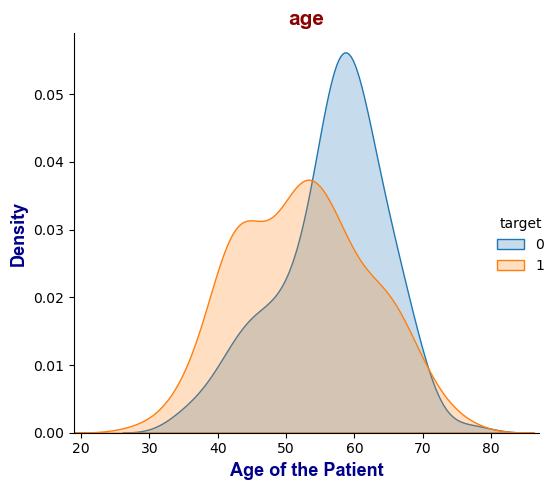

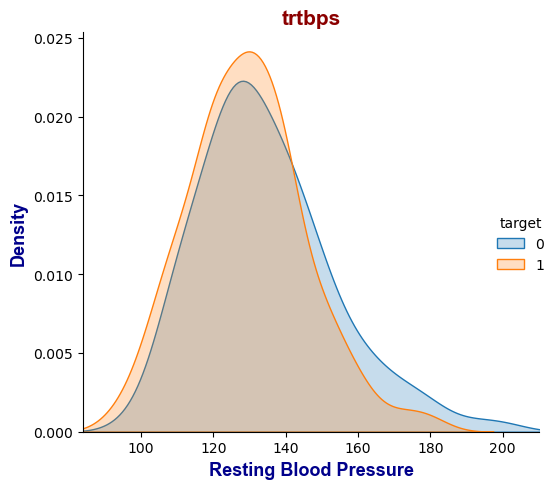

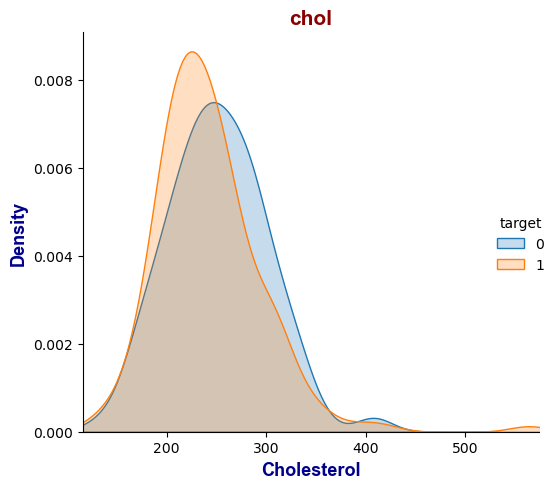

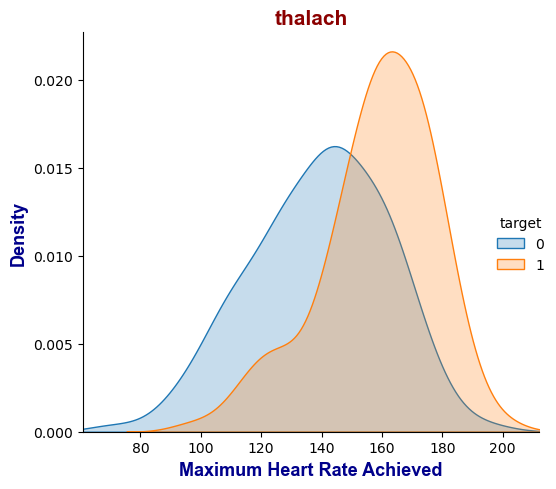

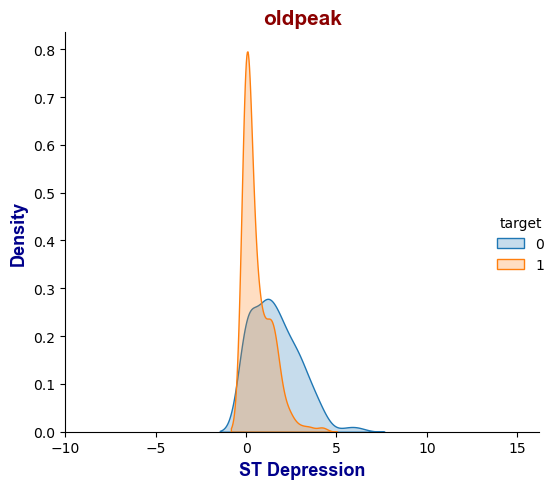

In [213]:
# Analysis with FacetGrid:


title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    graph = sns.FacetGrid(df[numeric_var], hue = "target", height = 5, xlim = ((df[i].min() - 10), (df[i].max() + 10)))
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [214]:
df[numeric_var].corr()

age    trtbps      chol   thalach   oldpeak    target
age      1.000000  0.279351  0.213678 -0.398522  0.210013 -0.225439
trtbps   0.279351  1.000000  0.123174 -0.046698  0.193216 -0.144931
chol     0.213678  0.123174  1.000000 -0.009940  0.053952 -0.085239
thalach -0.398522 -0.046698 -0.009940  1.000000 -0.344187  0.421741
oldpeak  0.210013  0.193216  0.053952 -0.344187  1.000000 -0.430696
target  -0.225439 -0.144931 -0.085239  0.421741 -0.430696  1.000000

In [215]:
df[numeric_var].corr().iloc[:, [-1]]  #All the correlation rows for the last column (-1)

target
age     -0.225439
trtbps  -0.144931
chol    -0.085239
thalach  0.421741
oldpeak -0.430696
target   1.000000

##### Age - Target Variable

The general belief is that heart attack increases with age.However, the graph tells us that we are wrong about this.
From the graph we can see that the number of people at risk of heart attack decreases as age progresses.
Let's take 55 as a base. There is an incredible increase in the blue graph after 55. In other words, there is a decrease in heart attack risk after the age of 55.
On the contrary, a decrease occurs after 55 in the orange graph. In other words, there is a decrease in the risk of heart attack after the age of 55.
To summarize, It's just a general thought that older people may be more likely to have a heart attack, but from a graph of the age and target distribution, it's clear that this isn't the case.
And correlation between them -0.225439. There is a negative correlation, which we can call little.

##### Trtbps - Target Variable
It is complicated to predict whether a patient will have a heart attack from resting blood pressure data.
Because if you notice, the two graphs are almost identical.
This means that the feature does not correlate well with the Target variable. So, in summary, A patient with a "trtbps" value of 130 may or may not be likely to have a heart attack.
And according to the graph, we can say that there is little correlation between the two variables. Correlation between them -0.144931. There is a negative correlation, which we can call little.

##### Chol - Target Variable
In the graph, we can say that a cholesterol value of 200-250 is precarious for the patients.
If you have noticed, especially at the beginning of the graph, patients with and without heart attack risk a similar image, while the increase in the probability of having a heart attack from 180 to 250 is noticeable.
After the value of 250, it becomes difficult to differentiate the probability of patients having a heart attack.
The correlation between the two variables is -0.085239. In other words, we can say that it is negative, but very little.

##### Thalach - Target Variable
There is a situation that is evident in this graph.
The higher the maximum reached heart rate, the higher the probability of the patient having a heart attack.
If you have noticed, there is a parallel increase in the two possibilities up to 150. However, after a value of 150, patients with a low probability of having a heart attack decrease, while patients with a high-risk probability increase incredibly.
It is evident in the distinction between the two bumps in the graph. This indicates that there is a correlation between the two variables.
The correlation between the two variables is 0.421741. In other words, we can say that it is positive and moderate.

##### Oldpeak - Target Variable
When we look at the graph, if the value of this variable is between 0 and 1.5, there is a significant increase in the probability of having a heart attack.
We can say that the range of 0 to 1.5 is the critical threshold for us.
It is evident in the distinction between the two bumps in the graph. This indicates a correlation between the two variables.
The correlation between the two variables is -0.430696. In other words, we can say that it is negative and moderate.

### 6.2. Categorical variables

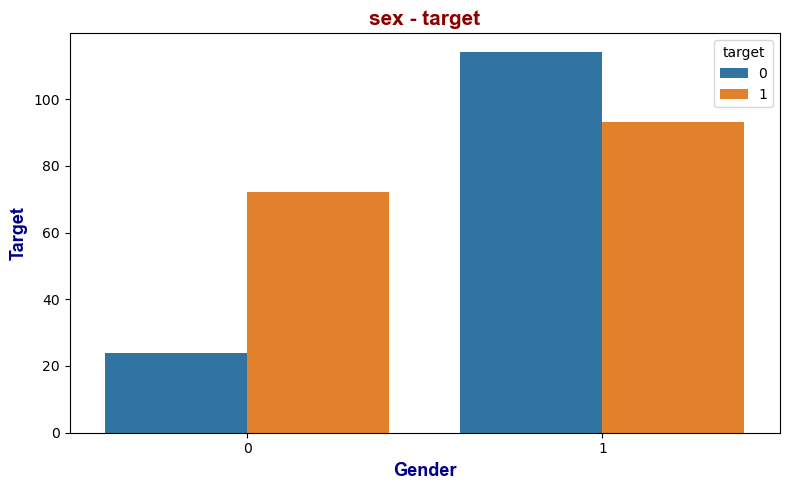

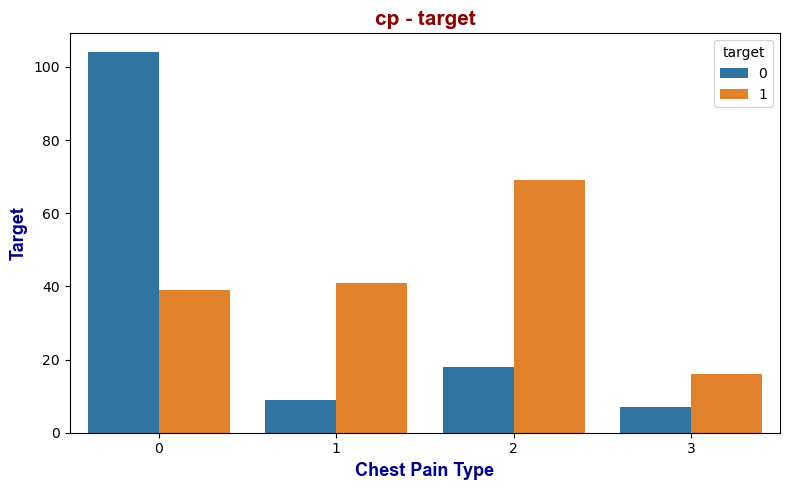

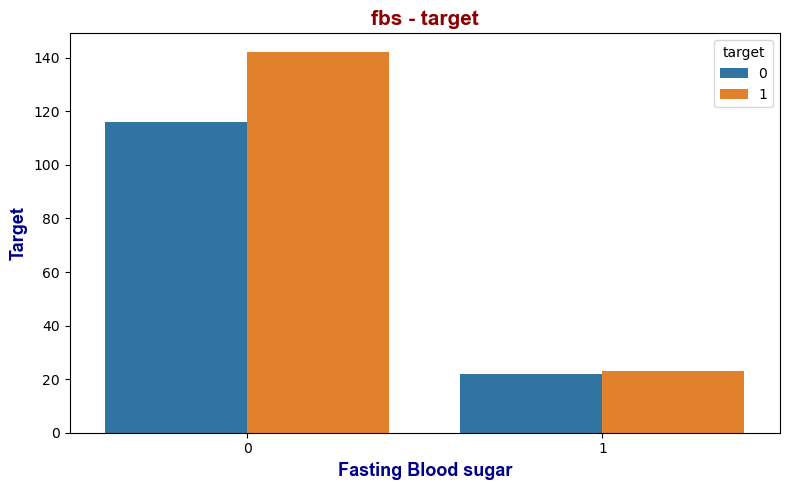

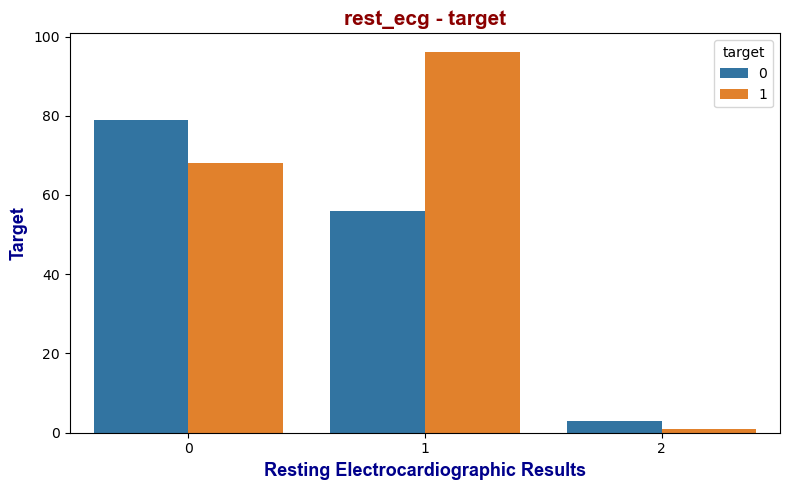

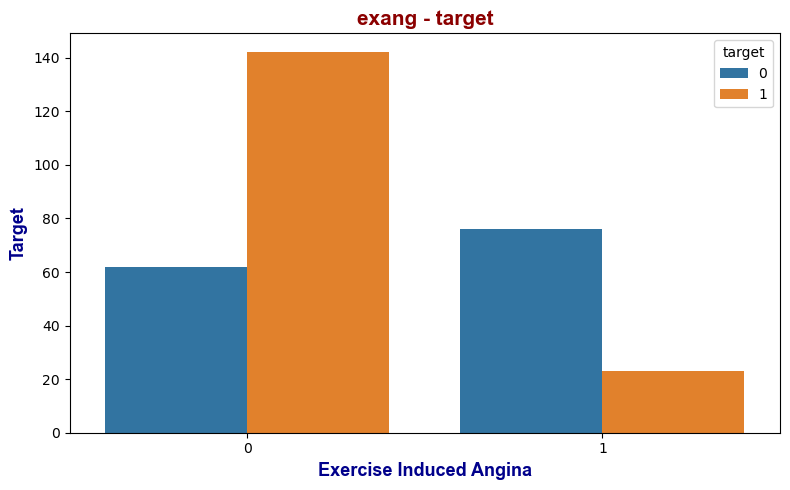

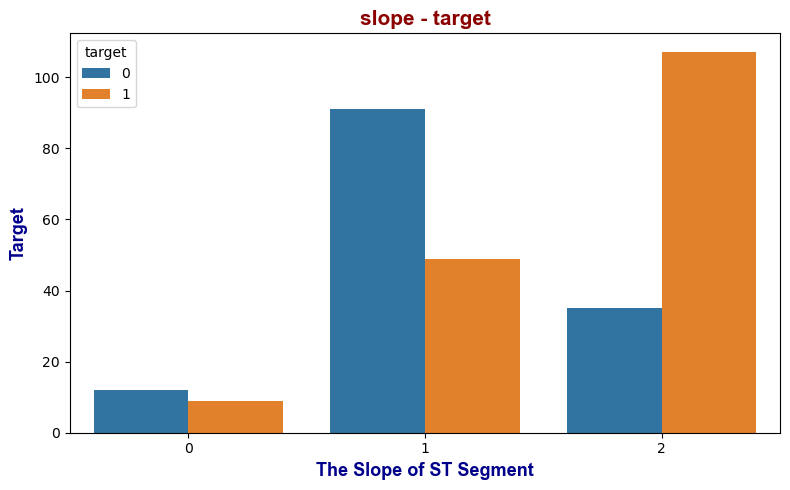

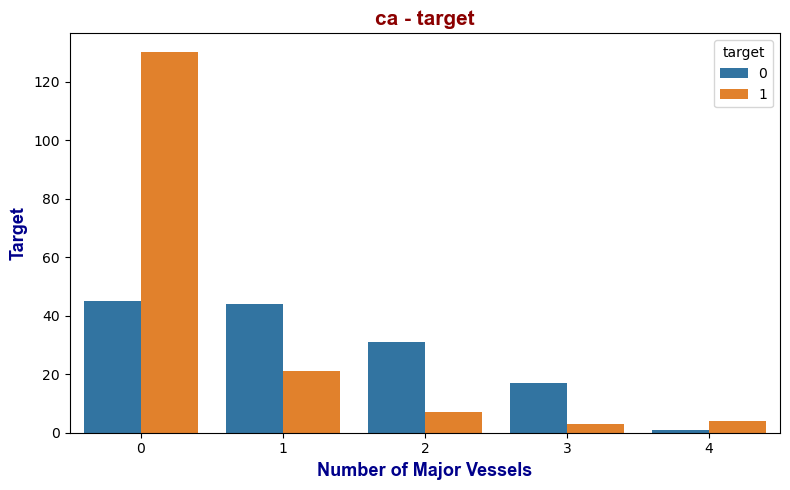

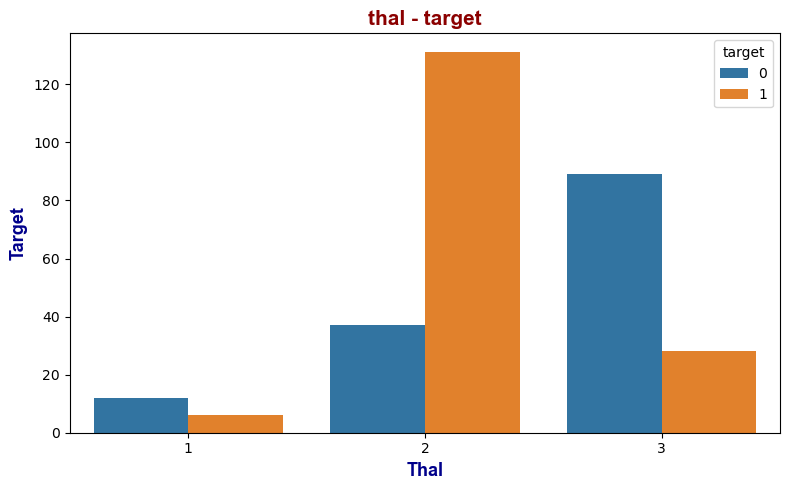

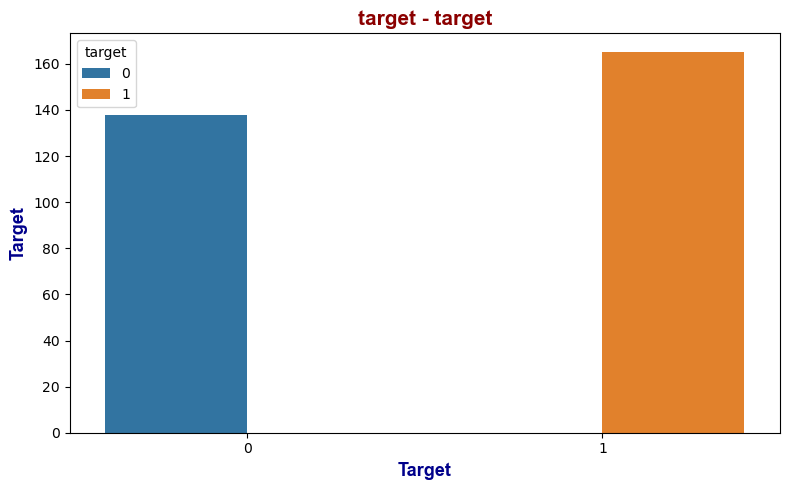

In [216]:
#We will do the analysis with the countplot

title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=i, data=df, hue="target")
    
    plt.title(i + " - target", fontdict=title_font)
    plt.xlabel(z, fontdict=axis_font)
    plt.ylabel("Target", fontdict=axis_font)
    
    plt.tight_layout()
    plt.show()


In [217]:
df[categoric_var].corr()

sex        cp       fbs  rest_ecg     exang     slope  \
sex       1.000000 -0.049353  0.045032 -0.058196  0.141664 -0.030711   
cp       -0.049353  1.000000  0.094444  0.044421 -0.394280  0.119717   
fbs       0.045032  0.094444  1.000000 -0.084189  0.025665 -0.059894   
rest_ecg -0.058196  0.044421 -0.084189  1.000000 -0.070733  0.093045   
exang     0.141664 -0.394280  0.025665 -0.070733  1.000000 -0.257748   
slope    -0.030711  0.119717 -0.059894  0.093045 -0.257748  1.000000   
ca        0.118261 -0.181053  0.137979 -0.072042  0.115739 -0.080155   
thal      0.211652 -0.169125 -0.011209 -0.013795  0.225508 -0.106310   
target   -0.280937  0.433798 -0.028046  0.137230 -0.436757  0.345877   

                ca      thal    target  
sex       0.118261  0.211652 -0.280937  
cp       -0.181053 -0.169125  0.433798  
fbs       0.137979 -0.011209 -0.028046  
rest_ecg -0.072042 -0.013795  0.137230  
exang     0.115739  0.225508 -0.436757  
slope    -0.080155 -0.106310  0.345877  
ca        1.000000  0.143248 -0.391724  
thal      0.143248  1.000000 -0.363322  
target   -0.391724 -0.363322  1.000000

In [218]:
df[categoric_var].corr().iloc[:,[-1]]

target
sex      -0.280937
cp        0.433798
fbs      -0.028046
rest_ecg  0.137230
exang    -0.436757
slope     0.345877
ca       -0.391724
thal     -0.363322
target    1.000000

##### Sex - Target Variable

Patients at high risk of heart attack from women are almost more than half of those with low.
The situation is different for those with an observation value of 1, that is, for men. The blue-colored bar has more observation values.
So men are more likely than not to have a heart attack.
In summary, female patients are at higher risk for heart attack
The correlation between the two variables is -0.280937. In other words, we can say that there is a negative low-intensity correlation.

##### Cp - Target Variable

First bar graph has an observation value of 0, asymptomatic pains.
Patients with this pain are less likely to have a heart attack. When we look at the probability of not having a heart attack, we can say that it is almost three times the other.
In the other three types of pain, having a heart attack is almost three times higher than the risk of not having it.
In summary, If a patient's "cp" variable is 1, 2, or 3, we can say that the risk of heart attack is high.
The correlation between the two variables is 0.433798. In other words, we can say that there is a positive, moderately strong correlation.

##### Fbs - Target Variable

The risk of heart attack is slightly higher in those with a 0 observation value as fasting blood sugar.
Patients with fasting blood sugar lower than 120 mg/dl can be positioned as risky.
If we look at the value of 1 observation value, the situation seems to be somewhat equal here.
In other words, it is a little challenging to say anything definite about heart attack in patients with fasting blood sugar greater than 120 mg/dl.
The correlation between the two variables is -0.028046. In other words, we can say that there is a very low-intensity correlation in the negative direction.


##### Rest_ecg - Target Variable

Attention should be paid to patients with a "rest ecg" value of 1. Because the risk of having a heart attack is almost two times higher than that of not having a heart attack.
The other two observation values are also more likely not to have a heart attack.
The correlation between the two variables is 0.137230. In other words, we can say that there is a positive low-intensity correlation.

##### Exang - Target Variable

Pain due to exercise does not affect the heart attack.
If the patient's "exang" variable is 1, that is, if he has exercise-related angina, the probability of not having a heart attack is higher.
In contrast, patients who do not have exercise-related angina are more likely to have a heart attack.
This means that exercise-related pain has nothing to do with a heart attack.
The correlation between the two variables is -0.436757. In other words, we can say that there is a negative, moderately strong correlation.


##### Slope - Target Variable
It is necessary to pay attention to the patients with a "slope" variable of 2.
Because patients with an observation value of 2 are three times more likely to have a heart attack than not having a heart attack.
If we examine other values, the risk of heart attack is lower in patients with an observation values of 0 and 1.
Especially if the observation value is 1, if it has a flat slope, we can say that it is two times more likely not to have a heart attack.
The correlation between the two variables is 0.345877. In other words, we can say that there is a positive, moderately strong correlation.


##### Ca - Target variable

The group at risk for this variable is patients with an observation value of 0.
If you notice, the risk of heart attack is almost three times higher in patients with an observation value of 0.
For 1, 2, and 3 observation values, this shows the opposite situation. In other words, patients with "ca" observation values of 1, 2, and 3 are almost twice as likely to have a heart attack as those not having them.
There is something remarkable here. Although the number of patients with a "CA" value of 4 is less than the general population, the risk of having a heart attack seems to be higher.
The correlation between the two variables is -0.363322. In other words, we can say that there is a negative, moderately strong correlation.


##### Thal - Target Variable

Patients with an observation value of 2 are three times more likely to have a heart attack than if they have not.
The opposite is true for other values. The situation of not having a heart attack appears to be higher.
The correlation between the two variables is -0.363322. In other words, we can say that there is a negative, moderately strong correlation.

### 6.3. Relationship between numerical variables

In [219]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [220]:
numeric_var.remove('target') #we remove this variable beccause we only want to asses relationship between the others.

In [221]:
df[numeric_var].head()

age  trtbps  chol  thalach  oldpeak
0   63     145   233      150      2.3
1   37     130   250      187      3.5
2   41     130   204      172      1.4
3   56     120   236      178      0.8
4   57     120   354      163      0.6

The pair plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis.

The scatter plot; is a drawing or mathematical diagram that typically uses Cartesian coordinates to display the values of two variables in a dataset. If the points are close to each other and have a regular appearance in terms of their directions, we can say a strong connection between the two variables. There is a directly proportional relationship between two variables in positive directional relationships. An increase in one variable causes an increase in the other variable. In negative relationships, there is an inversely proportional relationship between the variables. When the value of one variable decreases, the other variable also decreases.

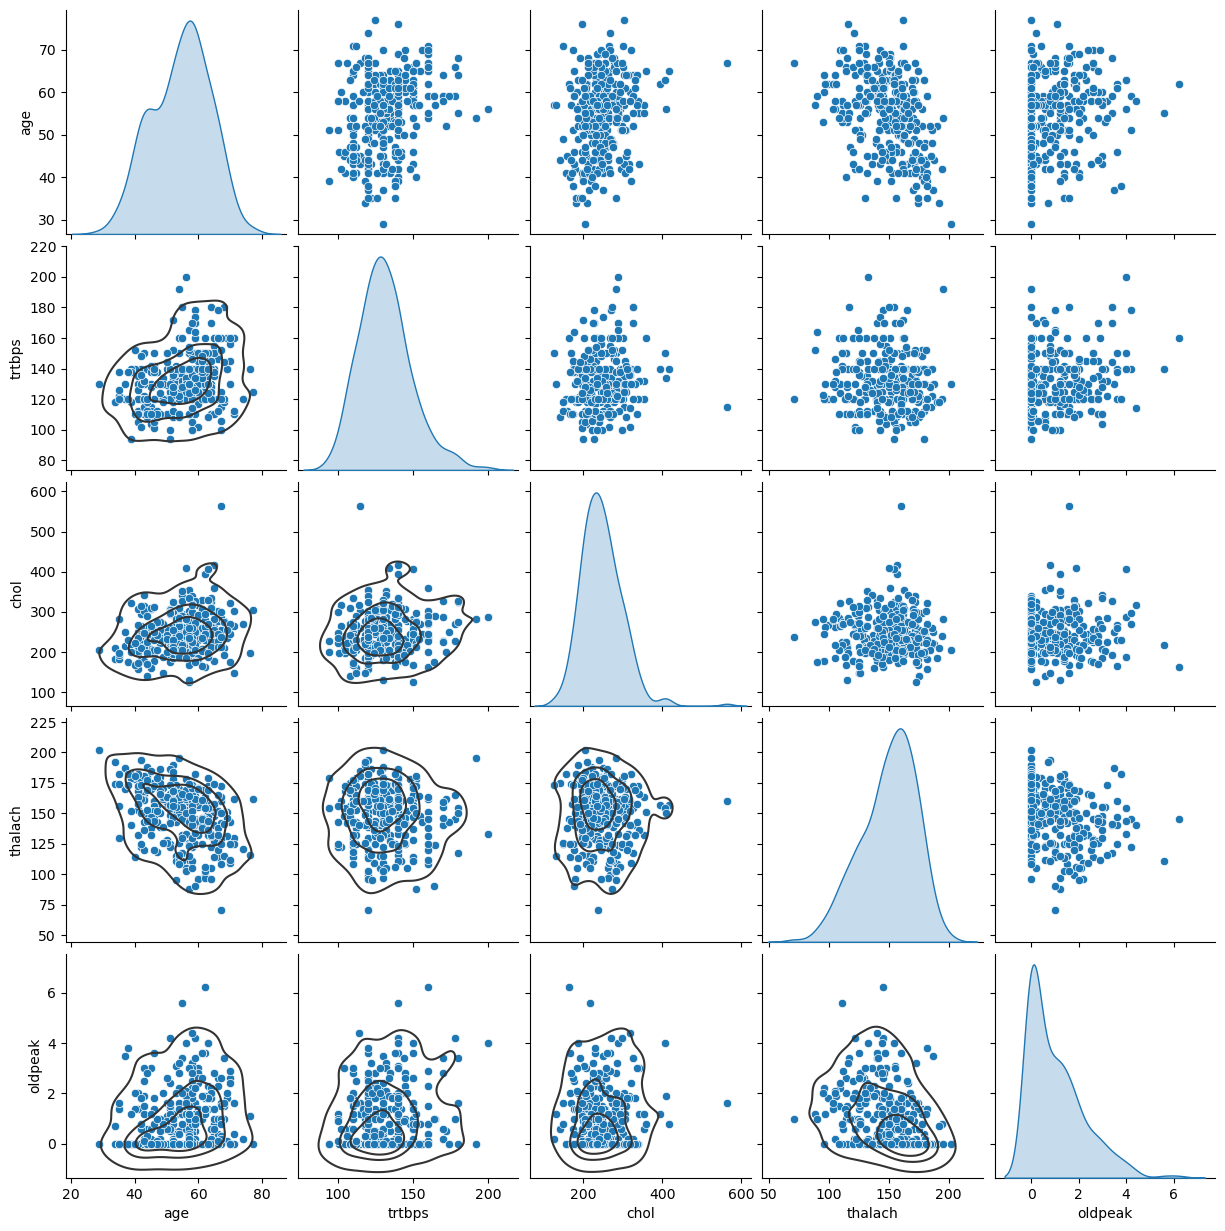

In [222]:
#We will do the analysis with the PAIR PLOT

graph = sns.pairplot(df[numeric_var], diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels = 4, color = ".2")
plt.show()


###### Age Variable

The age variable with the most relationship is the "thalach" variable.
There is a collection of points extending in the southwest direction.
There is a negative correlation since the points are pointing downwards.
However, since the points are somewhat scattered, this correlation is moderate.

##### Trtbps Variable

The relationship between "Trtbps" and other variables is weak.
There is clutter in the graphics in general.
With the age variable, the dots appear a little more often. There is a positive correlation.
The lowest correlation is with the "thalach" variable. The dots are incredibly messy. There is no smooth distribution.

##### Chol Variable

The variables that have the highest correlation with the variable "chol" are "age" and "trtbps".
However, the relationship between the "age" variable is slightly higher.
So cholesterol increases with age.
There is almost no relationship with other variables.

##### Thalach Variable

The age variable has the most relationship with the Thalach variable. There seems to be a moderately negative relationship.
There is not much correlation between the variable "trtbps" and "chol". The dots are too scattered.
When we look at the relationship with the "old peak" variable, we can say a close relationship with the middle level.

##### Oldpeak Variable

We cannot find an explicit expression when interpreting the graphics of this variable because the relationship with all variables is similar to each other.
However, we can say this in general: There is a close relationship with moderate with all variables.


### 6.4. Feature scaling

In [57]:
from sklearn.preprocessing import RobustScaler

In [58]:
robust_scaler = RobustScaler()

In [59]:
scaled_data = robust_scaler.fit_transform(df[numeric_var])

In [60]:
df_scaled = pd.DataFrame(scaled_data, columns = numeric_var)
df_scaled.head()

age  trtbps      chol   thalach  oldpeak
0  0.592593    0.75 -0.110236 -0.092308   0.9375
1 -1.333333    0.00  0.157480  1.046154   1.6875
2 -1.037037    0.00 -0.566929  0.584615   0.3750
3  0.074074   -0.50 -0.062992  0.769231   0.0000
4  0.148148   -0.50  1.795276  0.307692  -0.1250

In [61]:
#Lets add the variable target to the dataframe:

df_new = pd.concat([df_scaled, df.loc[:, "target"]], axis = 1)
df_new.head()


age  trtbps      chol   thalach  oldpeak  target
0  0.592593    0.75 -0.110236 -0.092308   0.9375       1
1 -1.333333    0.00  0.157480  1.046154   1.6875       1
2 -1.037037    0.00 -0.566929  0.584615   0.3750       1
3  0.074074   -0.50 -0.062992  0.769231   0.0000       1
4  0.148148   -0.50  1.795276  0.307692  -0.1250       1

In [62]:
melted_data = pd.melt(df_new, id_vars = "target", var_name = "variables", value_name = "value")
melted_data

target variables     value
0          1       age  0.592593
1          1       age -1.333333
2          1       age -1.037037
3          1       age  0.074074
4          1       age  0.148148
...      ...       ...       ...
1510       0   oldpeak -0.375000
1511       0   oldpeak  0.250000
1512       0   oldpeak  1.625000
1513       0   oldpeak  0.250000
1514       0   oldpeak -0.500000

[1515 rows x 3 columns]

The swarm plot is a scatter plot used to represent categorical values. It is very similar to the strip plot, but it avoids overlapping points. It is not advisable to use this type of graph when the sample size is large.


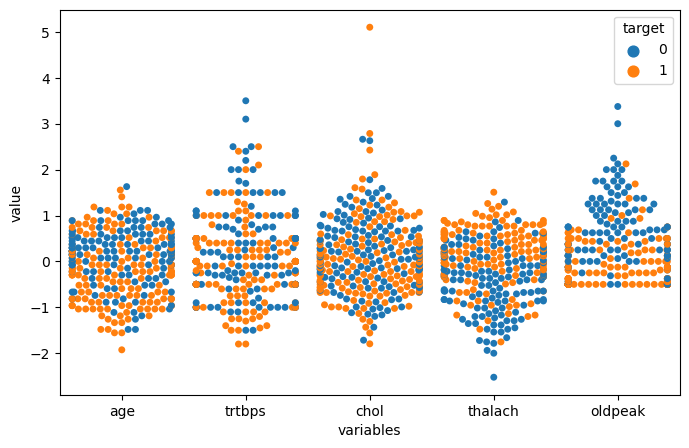

In [63]:
plt.figure(figsize = (8, 5))
sns.swarmplot(x = "variables", y = "value", hue = "target", data = melted_data)
plt.show()

### 6.5. Numerical-categorical variables analysis

###### Swarm plot

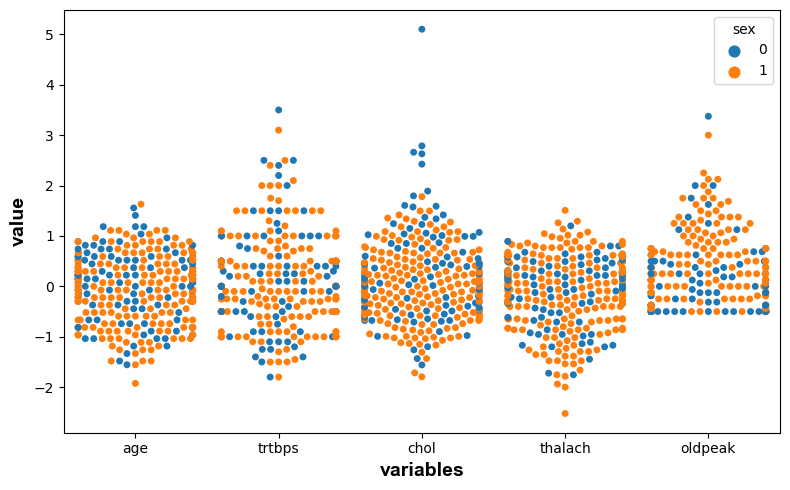

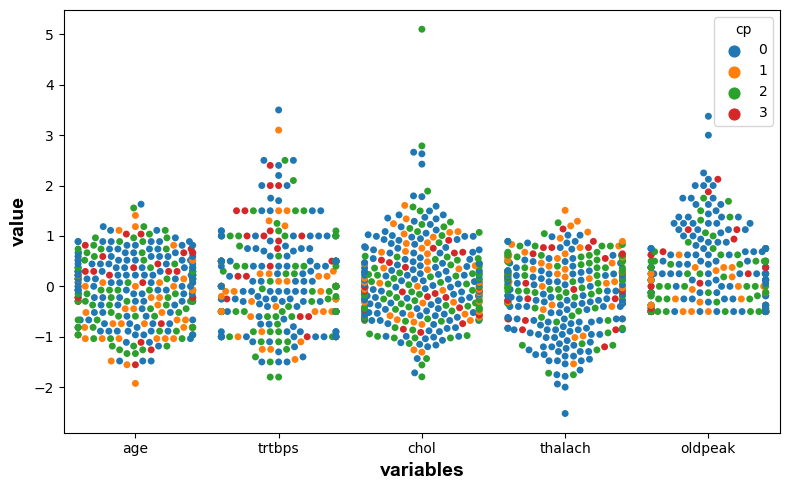

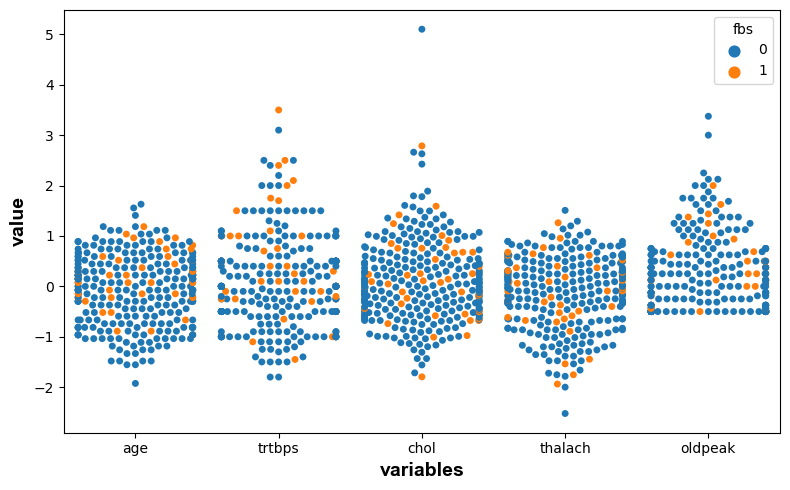

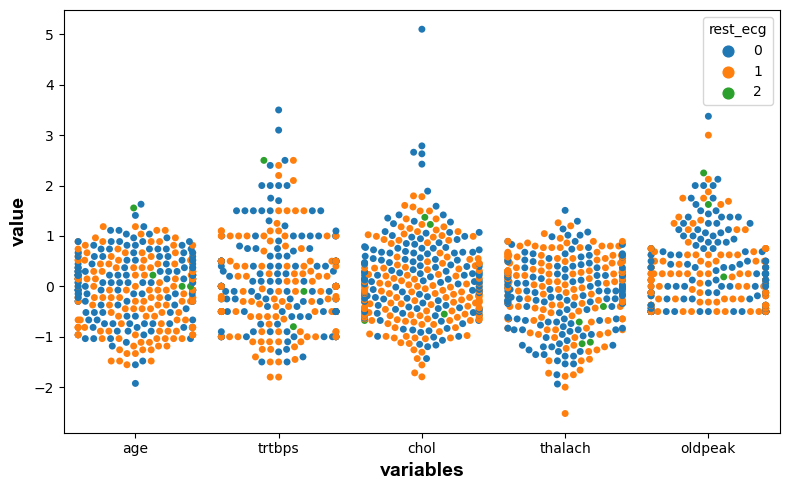

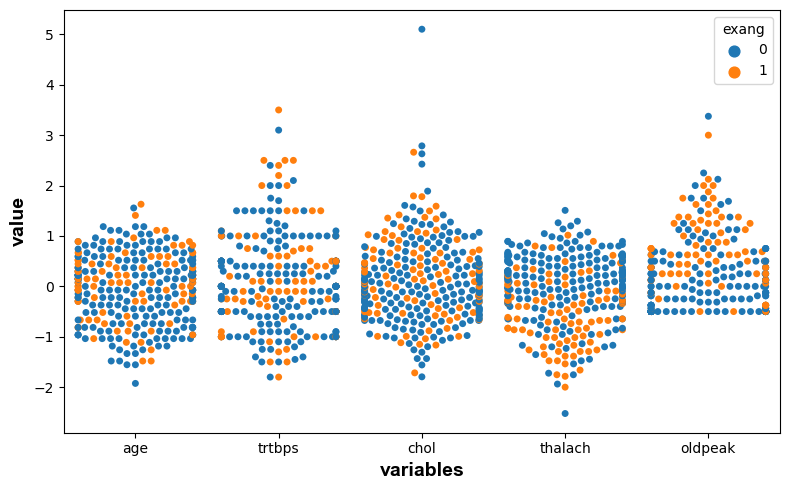

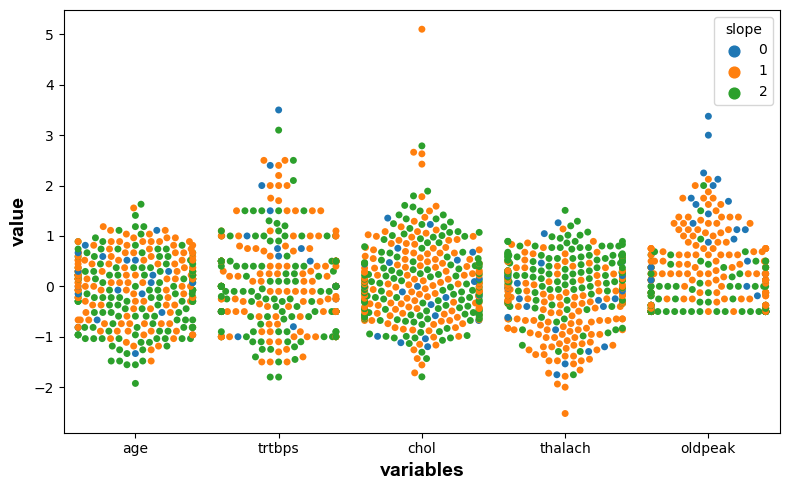

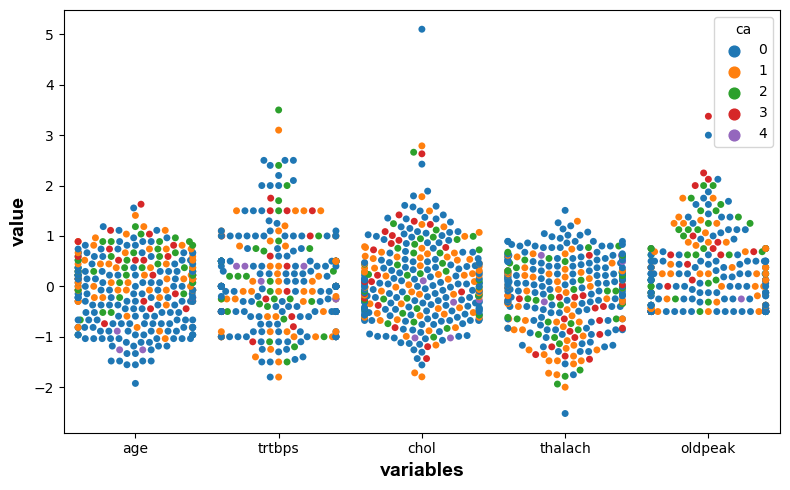

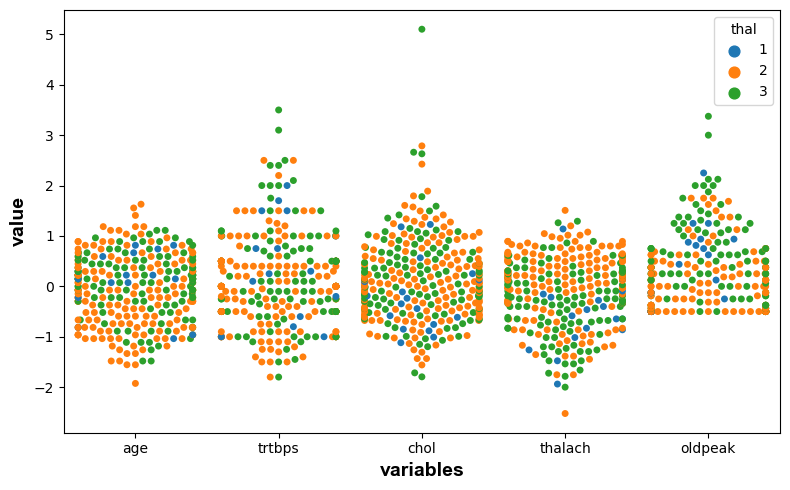

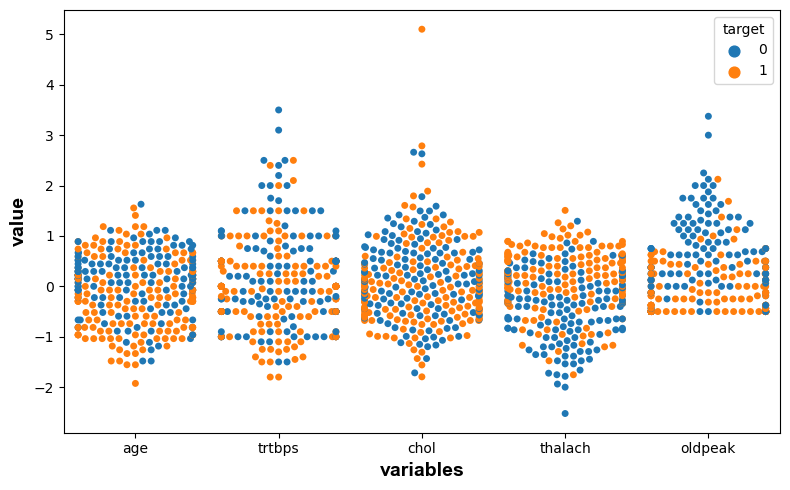

In [64]:
axis_font = {"family" : "arial", "color" : "black", "weight" : "bold", "size" : 14}
for i in df[categoric_var]:
    df_new = pd.concat([df_scaled, df.loc[:, i]], axis = 1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = "variables", value_name = "value")
    
    plt.figure(figsize = (8, 5))
    sns.swarmplot(x = "variables", y = "value", hue = i, data = melted_data)
    
    plt.xlabel("variables", fontdict = axis_font)
    plt.ylabel("value", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

###### Boxplot

The variables outside the boxplot can be considered as outliers. If the medium line of one boxplot is not aligned and it goes away from the other boxplot the thwo variables are likely to be related.

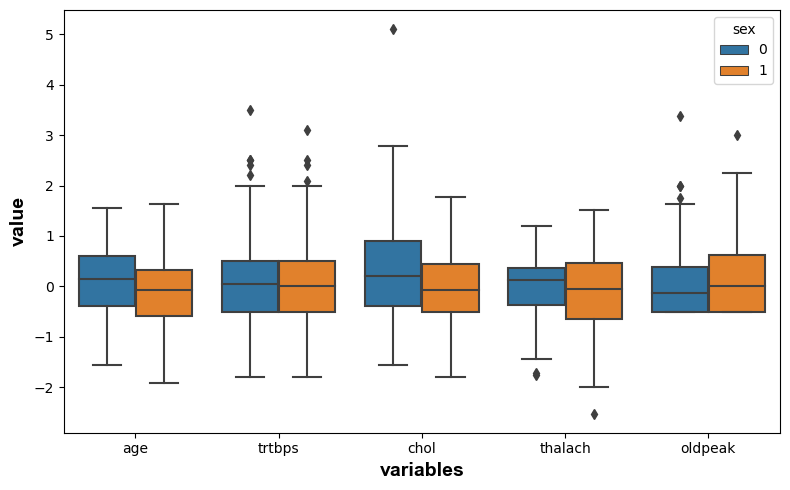

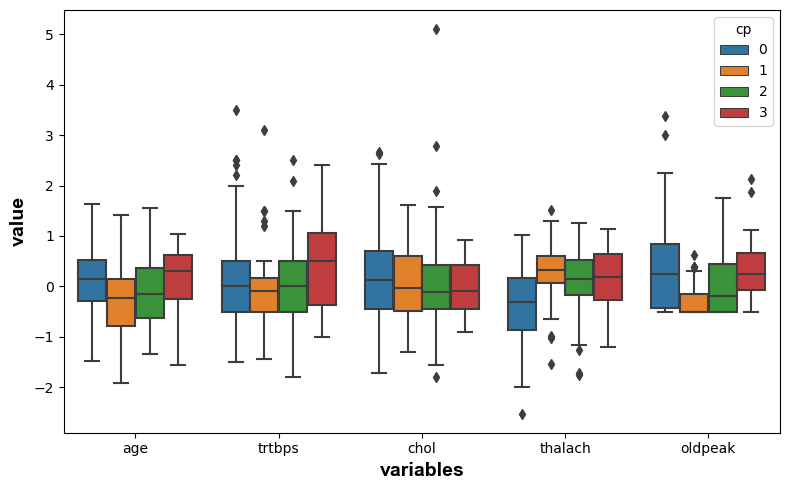

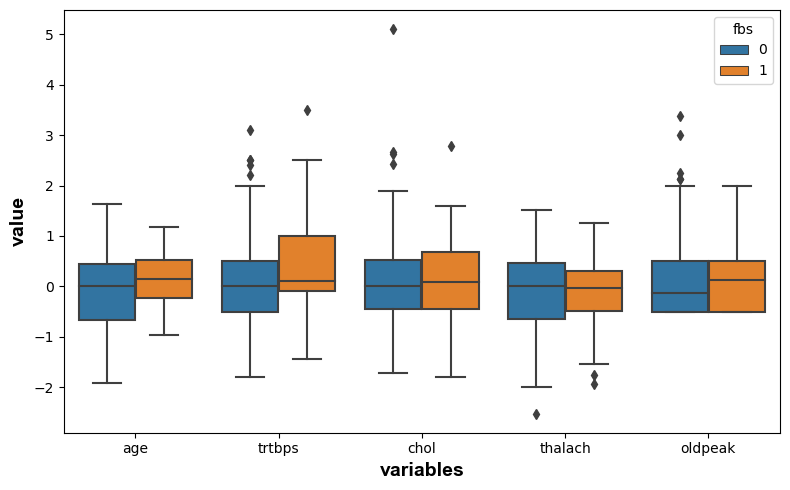

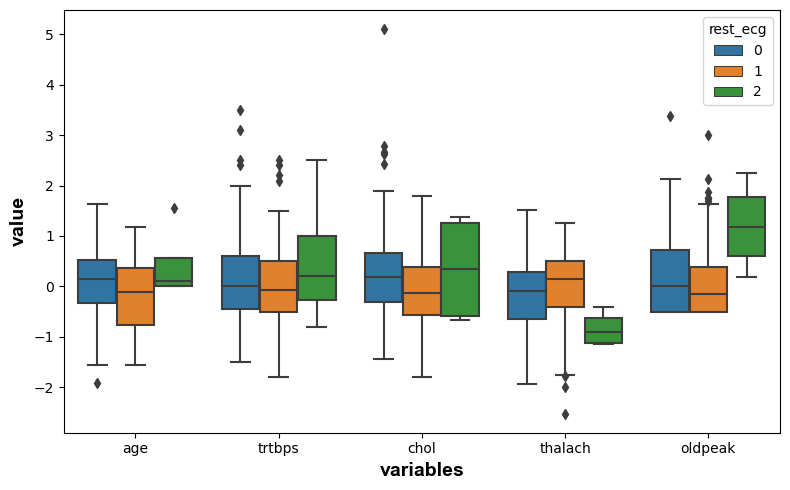

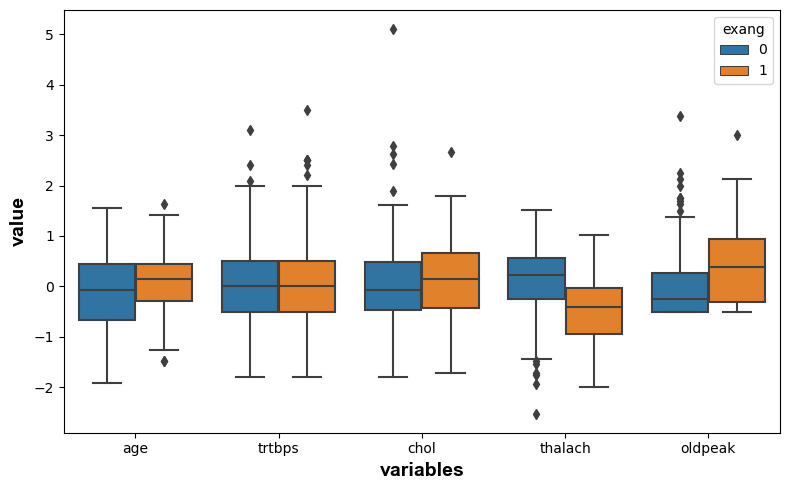

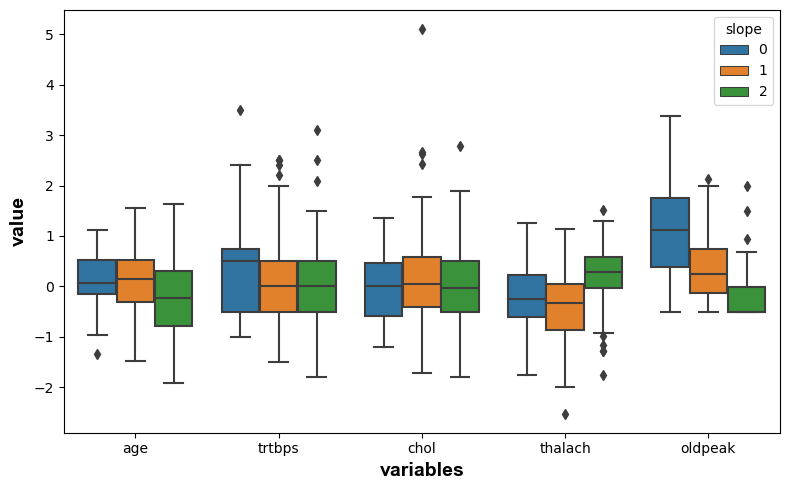

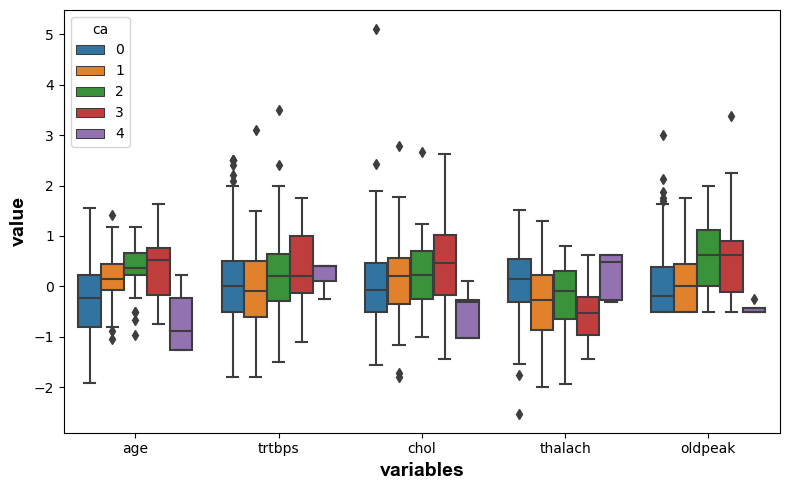

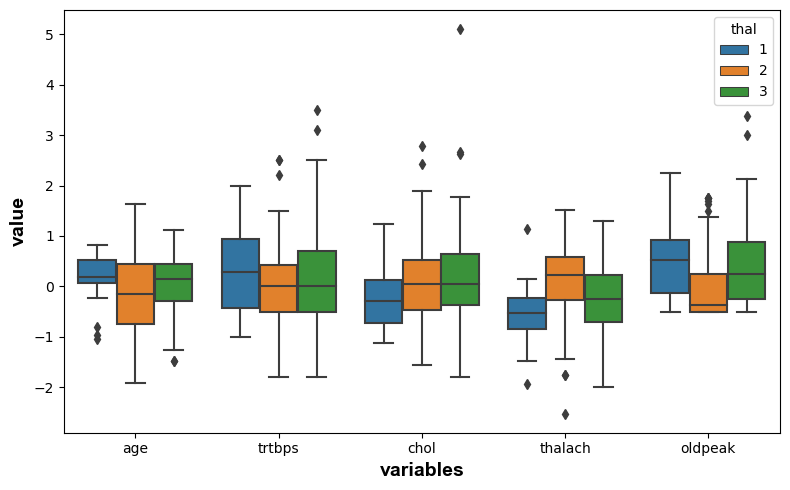

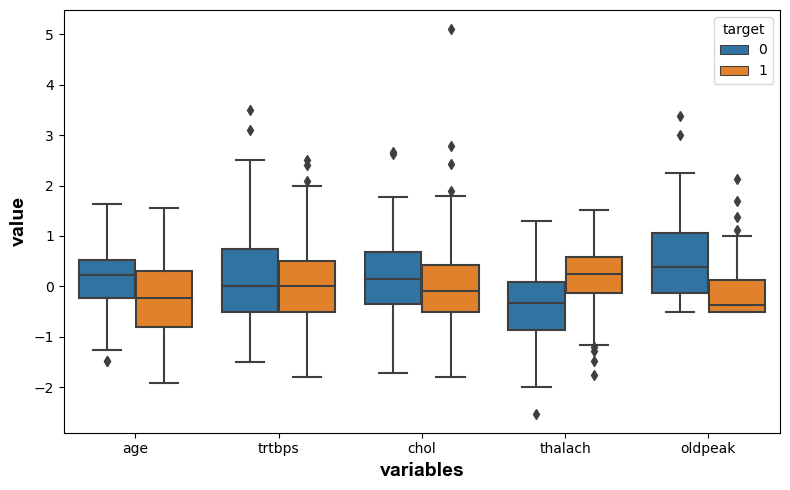

In [65]:
axis_font = {"family" : "arial", "color" : "black", "weight" : "bold", "size" : 14}
for i in df[categoric_var]:
    df_new = pd.concat([df_scaled, df.loc[:, i]], axis = 1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = "variables", value_name = "value")
    
    plt.figure(figsize = (8, 5))
    sns.boxplot(x = "variables", y = "value", hue = i, data = melted_data)
    
    plt.xlabel("variables", fontdict = axis_font)
    plt.ylabel("value", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

###### Heatmap

In [66]:
df_scaled


age  trtbps      chol   thalach  oldpeak
0    0.592593    0.75 -0.110236 -0.092308   0.9375
1   -1.333333    0.00  0.157480  1.046154   1.6875
2   -1.037037    0.00 -0.566929  0.584615   0.3750
3    0.074074   -0.50 -0.062992  0.769231   0.0000
4    0.148148   -0.50  1.795276  0.307692  -0.1250
..        ...     ...       ...       ...      ...
298  0.148148    0.50  0.015748 -0.923077  -0.3750
299 -0.740741   -1.00  0.377953 -0.646154   0.2500
300  0.962963    0.70 -0.740157 -0.369231   1.6250
301  0.148148    0.00 -1.716535 -1.169231   0.2500
302  0.148148    0.00 -0.062992  0.646154  -0.5000

[303 rows x 5 columns]

In [67]:
df_new2 = pd.concat([df_scaled, df[categoric_var]], axis = 1)
df_new2

age  trtbps      chol   thalach  oldpeak  sex  cp  fbs  rest_ecg  \
0    0.592593    0.75 -0.110236 -0.092308   0.9375    1   3    1         0   
1   -1.333333    0.00  0.157480  1.046154   1.6875    1   2    0         1   
2   -1.037037    0.00 -0.566929  0.584615   0.3750    0   1    0         0   
3    0.074074   -0.50 -0.062992  0.769231   0.0000    1   1    0         1   
4    0.148148   -0.50  1.795276  0.307692  -0.1250    0   0    0         1   
..        ...     ...       ...       ...      ...  ...  ..  ...       ...   
298  0.148148    0.50  0.015748 -0.923077  -0.3750    0   0    0         1   
299 -0.740741   -1.00  0.377953 -0.646154   0.2500    1   3    0         1   
300  0.962963    0.70 -0.740157 -0.369231   1.6250    1   0    1         1   
301  0.148148    0.00 -1.716535 -1.169231   0.2500    1   0    0         1   
302  0.148148    0.00 -0.062992  0.646154  -0.5000    0   1    0         0   

     exang  slope  ca  thal  target  
0        0      0   0     1       1  
1        0      0   0     2       1  
2        0      2   0     2       1  
3        0      2   0     2       1  
4        1      2   0     2       1  
..     ...    ...  ..   ...     ...  
298      1      1   0     3       0  
299      0      1   0     3       0  
300      0      1   2     3       0  
301      1      1   1     3       0  
302      0      1   1     2       0  

[303 rows x 14 columns]

In [68]:
df_new2.corr()

age    trtbps      chol   thalach   oldpeak       sex  \
age       1.000000  0.279351  0.213678 -0.398522  0.210013 -0.098447   
trtbps    0.279351  1.000000  0.123174 -0.046698  0.193216 -0.056769   
chol      0.213678  0.123174  1.000000 -0.009940  0.053952 -0.197912   
thalach  -0.398522 -0.046698 -0.009940  1.000000 -0.344187 -0.044020   
oldpeak   0.210013  0.193216  0.053952 -0.344187  1.000000  0.096093   
sex      -0.098447 -0.056769 -0.197912 -0.044020  0.096093  1.000000   
cp       -0.068653  0.047608 -0.076904  0.295762 -0.149230 -0.049353   
fbs       0.121308  0.177531  0.013294 -0.008567  0.005747  0.045032   
rest_ecg -0.116211 -0.114103 -0.151040  0.044123 -0.058770 -0.058196   
exang     0.096801  0.067616  0.067023 -0.378812  0.288223  0.141664   
slope    -0.168814 -0.121475 -0.004038  0.386784 -0.577537 -0.030711   
ca        0.276326  0.101389  0.070511 -0.213177  0.222682  0.118261   
thal      0.066745  0.060638  0.087866 -0.115310  0.210236  0.211652   
target   -0.225439 -0.144931 -0.085239  0.421741 -0.430696 -0.280937   

                cp       fbs  rest_ecg     exang     slope        ca  \
age      -0.068653  0.121308 -0.116211  0.096801 -0.168814  0.276326   
trtbps    0.047608  0.177531 -0.114103  0.067616 -0.121475  0.101389   
chol     -0.076904  0.013294 -0.151040  0.067023 -0.004038  0.070511   
thalach   0.295762 -0.008567  0.044123 -0.378812  0.386784 -0.213177   
oldpeak  -0.149230  0.005747 -0.058770  0.288223 -0.577537  0.222682   
sex      -0.049353  0.045032 -0.058196  0.141664 -0.030711  0.118261   
cp        1.000000  0.094444  0.044421 -0.394280  0.119717 -0.181053   
fbs       0.094444  1.000000 -0.084189  0.025665 -0.059894  0.137979   
rest_ecg  0.044421 -0.084189  1.000000 -0.070733  0.093045 -0.072042   
exang    -0.394280  0.025665 -0.070733  1.000000 -0.257748  0.115739   
slope     0.119717 -0.059894  0.093045 -0.257748  1.000000 -0.080155   
ca       -0.181053  0.137979 -0.072042  0.115739 -0.080155  1.000000   
thal     -0.169125 -0.011209 -0.013795  0.225508 -0.106310  0.143248   
target    0.433798 -0.028046  0.137230 -0.436757  0.345877 -0.391724   

              thal    target  
age       0.066745 -0.225439  
trtbps    0.060638 -0.144931  
chol      0.087866 -0.085239  
thalach  -0.115310  0.421741  
oldpeak   0.210236 -0.430696  
sex       0.211652 -0.280937  
cp       -0.169125  0.433798  
fbs      -0.011209 -0.028046  
rest_ecg -0.013795  0.137230  
exang     0.225508 -0.436757  
slope    -0.106310  0.345877  
ca        0.143248 -0.391724  
thal      1.000000 -0.363322  
target   -0.363322  1.000000

<AxesSubplot:>

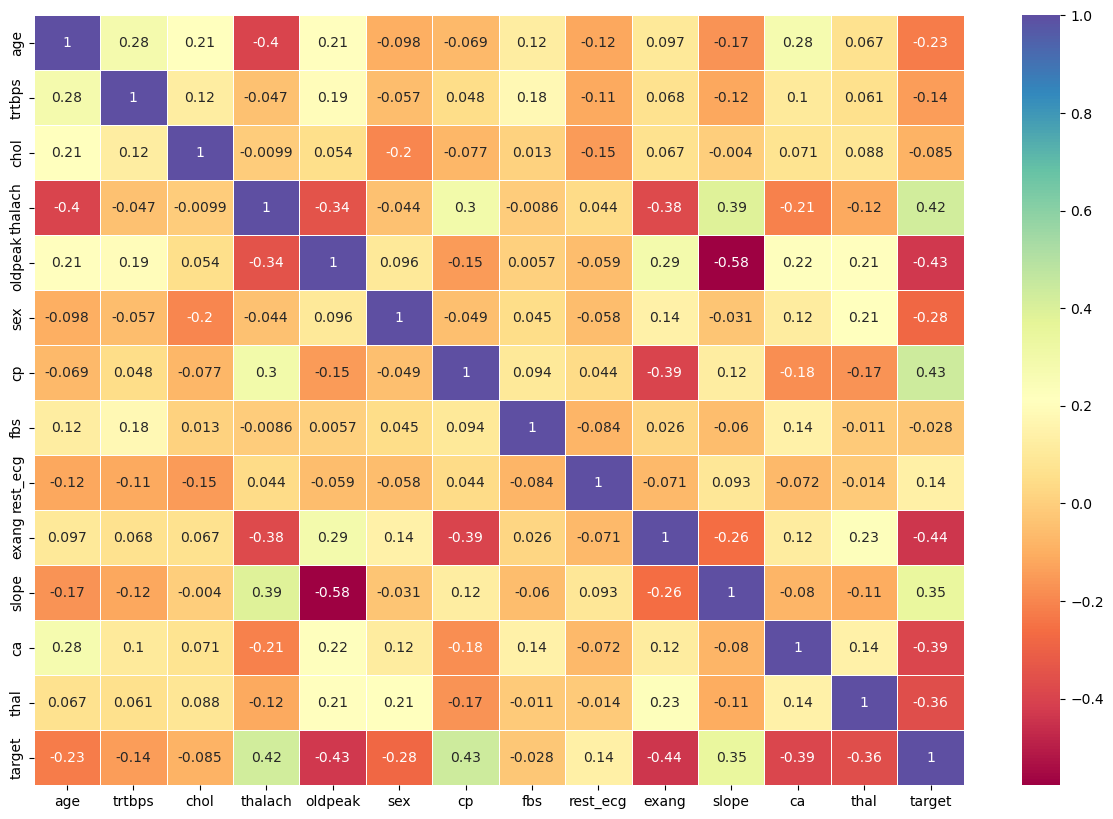

In [69]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_new2.corr(), cmap = "Spectral", annot = True, linewidths = 0.5) #annot = True prints the corr coeff

## 7. PREPARATION FOR MODELLING IN ML

#### 7.1 Dropping columns with low correlation

In [70]:
df.drop(["chol", "fbs", "rest_ecg"], axis = 1, inplace = True)  # Permanent changes: Inplace parameter = True
df.head()

age  sex  cp  trtbps  thalach  exang  oldpeak  slope  ca  thal  target
0   63    1   3     145      150      0      2.3      0   0     1       1
1   37    1   2     130      187      0      3.5      0   0     2       1
2   41    0   1     130      172      0      1.4      2   0     2       1
3   56    1   1     120      178      0      0.8      2   0     2       1
4   57    0   0     120      163      1      0.6      2   0     2       1

#### 7.2 Outliers

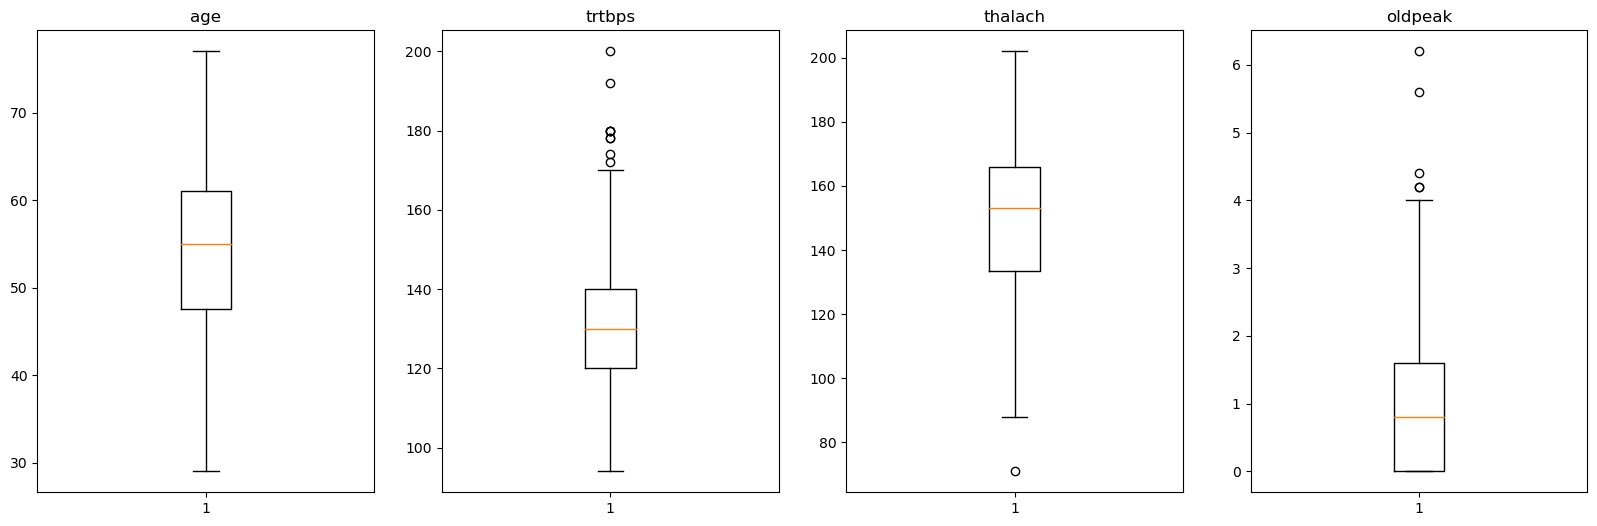

In [71]:
# We visualize the outliers from the numerical variables using the boxplot:

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalach"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

We can see that there are three numerical variables that have outliers (trbps, thalach and ondpeak). Let's deal with these outliers. We will use the z-score method to detect outliers in a dataset. The z-score measures how many standard deviations a data point is away from the mean. By identifying data points that have a z-score above a certain threshold, we can consider them as potential outliers.

From looking at the boxplots, the variables that have the orange line in the center of the box are likely to follow a symetric or normal distribution. 

In [72]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize 

In [73]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print("-------------------")

Threshold Value: 1
Number of Outliers: 51
-------------------
Threshold Value: 2
Number of Outliers: 13
-------------------
Threshold Value: 3
Number of Outliers: 2
-------------------


##### TRTBPS OUTLIERS

The winsorized method for handling outliers is commonly applied when the underlying data follows a symmetric distribution, such as the normal distribution (like the TRBPS variable). 

In [74]:
df[z_scores_trtbps > 2][["trtbps"]]  #We decide 2 as a threshold value

trtbps
8       172
101     178
110     180
152     170
195     170
203     180
223     200
228     170
241     174
248     192
260     178
266     180
292     170

In [75]:
df[z_scores_trtbps > 2].trtbps.min() #The minimum value that satisfies the condition. 

170

In [76]:
df[df["trtbps"] < 170].trtbps.max() #From the values that satisfy the condition we take the maximum one for the percentile

165

In [77]:
winsorize_percentile_trtbps = (stats.percentileofscore(df["trtbps"], 165)) / 100
print(winsorize_percentile_trtbps)

0.957095709570957


This line below calculates the complement of the winsorize percentile. Since the winsorize percentile represents the threshold below which values are replaced, subtracting it from 1 gives the threshold above which values are replaced. 

In [78]:
1 - winsorize_percentile_trtbps

0.04290429042904298

The line below applies the winsorizing transformation to the "trtbps" variable in the DataFrame df. The winsorize() function is called with two arguments: the data to be winsorized (df.trtbps) and a tuple specifying the lower and upper percentiles for winsorization. In this case, the lower percentile is set to 0 (no replacement below this threshold), and the upper percentile is set to 1 - winsorize_percentile_trtbps. This means that values above this threshold will be replaced with the winsorize percentile value.  Winsorizing can be used as an alternative to removing outliers from a dataset. Instead of completely eliminating the outlier values, winsorizing allows you to modify them while retaining some information. By winsorizing at a specific percentile, you ensure that extreme values are adjusted to a certain level while preserving the remaining data points.

In [79]:
trtbps_winsorize = winsorize(df.trtbps, (0, (1 - winsorize_percentile_trtbps)))

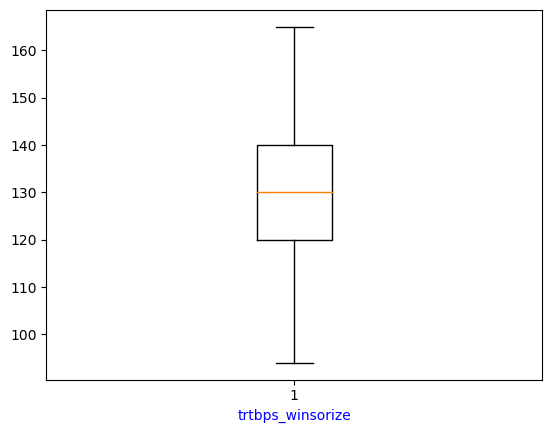

In [80]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color = "b")
plt.show()  #Now we see no outliers in the boxplot

In [81]:
df["trtbps_winsorize"] = trtbps_winsorize #We add the data without outliers to the original dataframe

##### THALACH OUTLIERS

We can not use the winsorized method because it doesn't follow a normal distribution or symetric. In summary, the iqr function below calculates the lower and upper thresholds based on the IQR, and then filters the DataFrame to return the rows that contain outliers. This code is useful for detecting and handling outliers in non-symmetric datasets based on the IQR method.
the value of 1.5 is used as a multiplier to determine the threshold for identifying outliers. This multiplier is a commonly used rule of thumb in the context of the interquartile range (IQR) method for outlier detection.

The IQR method defines outliers as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 and Q3 represent the first and third quartiles, respectively, and IQR is the interquartile range.

The choice of 1.5 as the multiplier is somewhat arbitrary but is often used as a reasonable default value. 

In [82]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff) #lower threshold for outlier detection
    upper_v = q3 + (1.5 * diff) #upper threshold for outlier detection
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [83]:
thalach_out = iqr(df, "thalach")

In [84]:
thalach_out

age  sex  cp  trtbps  thalach  exang  oldpeak  slope  ca  thal  target  \
272   67    1   0     120       71      0      1.0      1   0     2       0   

     trtbps_winsorize  
272               120

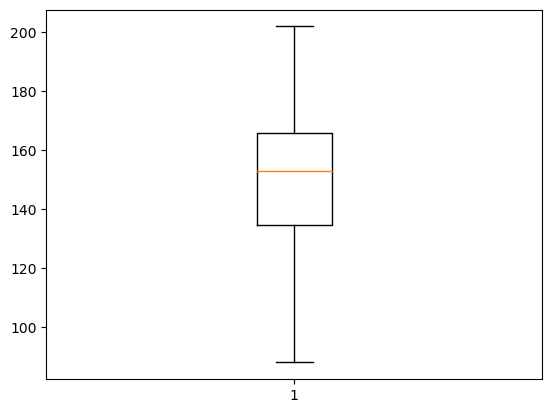

In [85]:
#We only have one outlier in one row so we can delete this row and it won't affect the results very much.

df.drop([272], axis = 0, inplace = True)
plt.boxplot(df["thalach"]);  #We see from the plot that we have removed all outliers


##### OLDPEAK OUTLIERS

In [86]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [87]:
iqr(df, "oldpeak")

age  sex  cp  trtbps  thalach  exang  oldpeak  slope  ca  thal  target  \
101   59    1   3     178      145      0      4.2      0   0     3       1   
204   62    0   0     160      145      0      6.2      0   3     3       0   
221   55    1   0     140      111      1      5.6      0   0     3       0   
250   51    1   0     140      122      1      4.2      1   3     3       0   
291   58    1   0     114      140      0      4.4      0   3     1       0   

     trtbps_winsorize  
101               165  
204               160  
221               140  
250               140  
291               114

In [88]:
df[df["oldpeak"] < 4.2].oldpeak.max()

4.0

In [89]:
winsorize_percentile_oldpeak = (stats.percentileofscore(df["oldpeak"], 4)) / 100
print(winsorize_percentile_oldpeak)

0.980132450331126


In [90]:
oldpeak_winsorize = winsorize(df.oldpeak, (0, (1 - winsorize_percentile_oldpeak)))

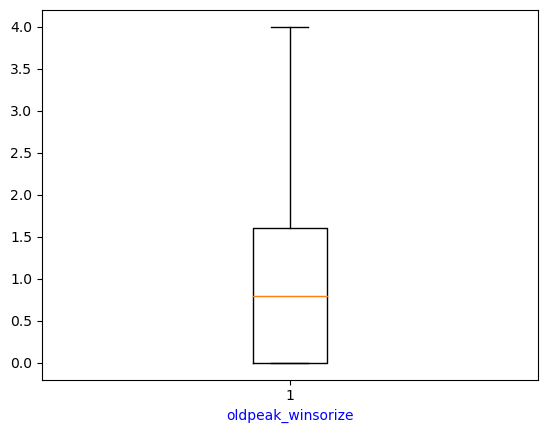

In [91]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize", color = "b")
plt.show()

In [92]:
df["oldpeak_winsorize"] = oldpeak_winsorize

In [93]:
df.drop(["trtbps", "oldpeak"], axis = 1, inplace = True)

In [94]:
df.head()


age  sex  cp  thalach  exang  slope  ca  thal  target  trtbps_winsorize  \
0   63    1   3      150      0      0   0     1       1               145   
1   37    1   2      187      0      0   0     2       1               130   
2   41    0   1      172      0      2   0     2       1               130   
3   56    1   1      178      0      2   0     2       1               120   
4   57    0   0      163      1      2   0     2       1               120   

   oldpeak_winsorize  
0                2.3  
1                3.5  
2                1.4  
3                0.8  
4                0.6

#### 7.3. Distributions of numeric variables

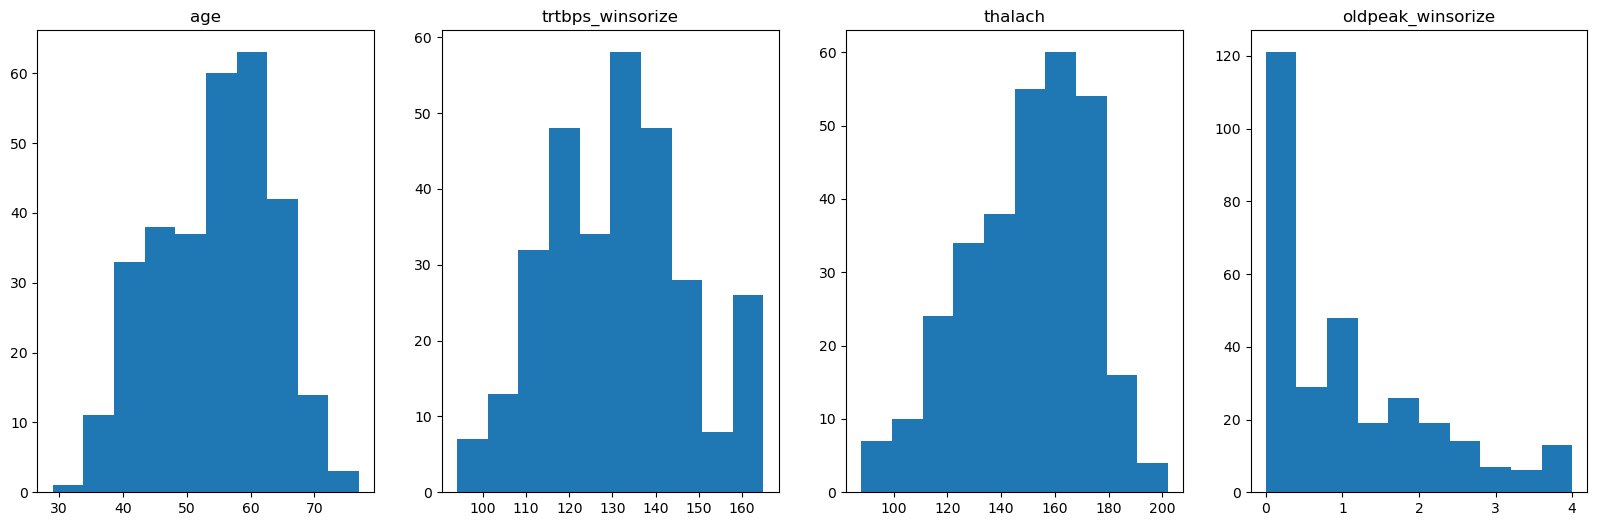

In [95]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.hist(df["age"])
ax1.set_title("age")

ax2.hist(df["trtbps_winsorize"])
ax2.set_title("trtbps_winsorize")

ax3.hist(df["thalach"])
ax3.set_title("thalach")

ax4.hist(df["oldpeak_winsorize"])
ax4.set_title("oldpeak_winsorize")

plt.show()

From the line of code below: .agg(["skew"]) - This line applies the "skew" aggregation function to the selected columns. The "skew" function calculates the skewness of a distribution, which measures the asymmetry of the data. Skewness helps identify whether the distribution is symmetric or skewed to the left (negative skewness) or right (positive skewness).

The interpretation of skewness values is as follows:

- Skewness = 0: A skewness value of 0 indicates a perfectly symmetric distribution, where the data is evenly distributed around the mean. The left tail is balanced by the right tail.

- Skewness > 0: Positive skewness indicates a right-skewed or positively skewed distribution. The tail on the right side of the distribution is longer or fatter, and the majority of the data is concentrated on the left side. The mean is typically greater than the median and the mode.

- Skewness < 0: Negative skewness indicates a left-skewed or negatively skewed distribution. The tail on the left side of the distribution is longer or fatter, and the majority of the data is concentrated on the right side. The mean is typically less than the median and the mode.

The magnitude of the skewness value also provides information about the extent of the skewness:

- A skewness value close to 0 (between -0.5 and 0.5) indicates a relatively small deviation from perfect symmetry.
- A skewness value greater than 0.5 or less than -0.5 suggests a moderate to high level of skewness.



.transpose() - This line transposes the resulting DataFrame so that the variables become rows and the skewness values become columns.

In [96]:
df[["age", "trtbps_winsorize", "thalach", "oldpeak_winsorize"]].agg(["skew"]).transpose() 

#We see that the oldpeak_winsorize data has a lot of positive skewness.

skew
age               -0.199209
trtbps_winsorize   0.251969
thalach           -0.461611
oldpeak_winsorize  0.996036

###### Transformation operations on unsymetrical data:

- Logarithmic transformation: Taking the logarithm of the data can compress the scale of the values, particularly for data that is right-skewed or positively skewed. This means that the larger values will be reduced more than the smaller values. As a result, the distribution becomes more symmetrical, with the tail on the right side of the distribution being pulled inwards. Logarithmic transformation is particularly effective for reducing the impact of extreme values and spreading out the data in the lower range.

- Square root transformation: The square root transformation is useful for reducing the skewness of data that is right-skewed or positively skewed. It has a similar effect to the logarithmic transformation in that it compresses the larger values more than the smaller values. This helps to spread out the data and make it more symmetrical. Square root transformation is especially effective when the magnitude of the values in the dataset is highly variable.

Both logarithmic and square root transformations can be helpful in addressing the issues caused by asymmetrical or skewed data. By making the data more symmetrical, these transformations can improve the suitability of the data for certain statistical analyses and modeling techniques that assume symmetric distributions or have assumptions related to equal variances.

In [97]:
#We will try both methods to see which one fits better on our data:

df["oldpeak_winsorize_log"] = np.log(df["oldpeak_winsorize"])
df["oldpeak_winsorize_sqrt"] = np.sqrt(df["oldpeak_winsorize"])

In [98]:
df[["oldpeak_winsorize", "oldpeak_winsorize_log", "oldpeak_winsorize_sqrt"]].agg(["skew"]).transpose() 
#The sqrt is the method that best fits.

skew
oldpeak_winsorize       0.996036
oldpeak_winsorize_log        NaN
oldpeak_winsorize_sqrt  0.108926

In [99]:
df.drop(["oldpeak_winsorize", "oldpeak_winsorize_log"], axis = 1, inplace = True)
df.head()


age  sex  cp  thalach  exang  slope  ca  thal  target  trtbps_winsorize  \
0   63    1   3      150      0      0   0     1       1               145   
1   37    1   2      187      0      0   0     2       1               130   
2   41    0   1      172      0      2   0     2       1               130   
3   56    1   1      178      0      2   0     2       1               120   
4   57    0   0      163      1      2   0     2       1               120   

   oldpeak_winsorize_sqrt  
0                1.516575  
1                1.870829  
2                1.183216  
3                0.894427  
4                0.774597

#### 7.4. One hot encoding for categorical variables

In [100]:
df_copy = df.copy()


In [101]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [102]:
categoric_var.remove("fbs")
categoric_var.remove("rest_ecg")

In [103]:
categoric_var


['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

In [104]:
df_copy = pd.get_dummies(df_copy, columns=categoric_var[:-1], drop_first=True)
df_copy = df_copy.astype(int)


In [105]:
df_copy.head()


age  thalach  target  trtbps_winsorize  oldpeak_winsorize_sqrt  sex_1  \
0   63      150       1               145                       1      1   
1   37      187       1               130                       1      1   
2   41      172       1               130                       1      0   
3   56      178       1               120                       0      1   
4   57      163       1               120                       0      0   

   cp_1  cp_2  cp_3  exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  \
0     0     0     1        0        0        0     0     0     0     0   
1     0     1     0        0        0        0     0     0     0     0   
2     1     0     0        0        0        1     0     0     0     0   
3     1     0     0        0        0        1     0     0     0     0   
4     0     0     0        1        0        1     0     0     0     0   

   thal_2  thal_3  
0       0       0  
1       1       0  
2       1       0  
3       1       0  
4       1       0

#### 7.5. Feautre scaling with RobustScaler

In [106]:
new_numeric_var = ["age", "thalach", "trtbps_winsorize", "oldpeak_winsorize_sqrt"]

In [107]:
robus_scaler = RobustScaler()

In [108]:
df_copy[new_numeric_var] = robust_scaler.fit_transform(df_copy[new_numeric_var])

In [109]:
df_copy.head()

age   thalach  target  trtbps_winsorize  oldpeak_winsorize_sqrt  \
0  0.581818 -0.095238       1              0.75                     1.0   
1 -1.309091  1.079365       1              0.00                     1.0   
2 -1.018182  0.603175       1              0.00                     1.0   
3  0.072727  0.793651       1             -0.50                     0.0   
4  0.145455  0.317460       1             -0.50                     0.0   

   sex_1  cp_1  cp_2  cp_3  exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  \
0      1     0     0     1        0        0        0     0     0     0     0   
1      1     0     1     0        0        0        0     0     0     0     0   
2      0     1     0     0        0        0        1     0     0     0     0   
3      1     1     0     0        0        0        1     0     0     0     0   
4      0     0     0     0        1        0        1     0     0     0     0   

   thal_2  thal_3  
0       0       0  
1       1       0  
2       1       0  
3       1       0  
4       1       0

#### 7.6. Test and training set

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X = df_copy.drop(["target"], axis = 1)
y = df_copy[["target"]] #variable that we want to predict

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)


In [114]:
X_train.head()

age   thalach  trtbps_winsorize  oldpeak_winsorize_sqrt  sex_1  \
201  0.363636 -0.380952             -0.25                     1.0      1   
82   0.363636  0.222222             -1.40                     0.0      0   
187 -0.072727 -1.396825             -0.30                     1.0      1   
259 -1.236364  0.920635             -0.50                     1.0      1   
5    0.145455 -0.158730              0.50                     0.0      1   

     cp_1  cp_2  cp_3  exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  \
201     0     0     0        1        1        0     1     0     0     0   
82      0     1     0        0        0        1     1     0     0     0   
187     0     0     0        1        1        0     1     0     0     0   
259     0     0     1        1        1        0     0     0     0     0   
5       0     0     0        0        1        0     0     0     0     0   

     thal_2  thal_3  
201       0       1  
82        1       0  
187       0       1  
259       0       1  
5         0       0

In [116]:
y_train.head()

target
201       0
82        1
187       0
259       0
5         1

In [117]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
X_test: 31
y_train: 271
y_test: 31


## 8. MODELLING FOR ML

#### 8.1. LOGISTIC REGRESSION

It's a good option when the dependent variable is categorical. 

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [119]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [121]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [123]:
y_pred = log_reg.predict(X_test) 
# We make a prediction with X_test (a data that the model has never seen before)

In [124]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [125]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8709677419354839


#### 8.2. CROSS VALIDATION

Cross-validation is a widely used technique in machine learning for assessing the performance and generalization capability of a model. It helps to estimate how well a model will perform on unseen data by evaluating its performance on different subsets of the available data.

The basic idea behind cross-validation is to partition the available data into multiple subsets or "folds." The model is then trained on a portion of the data and evaluated on the remaining portion. This process is repeated multiple times, with different subsets of the data used for training and evaluation in each iteration. The results from all iterations are then averaged to provide an overall performance estimate.

In [126]:
from sklearn.model_selection import cross_val_score

In [128]:
scores = cross_val_score(log_reg, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

#The good result means that the model has not memorized the data and there is no overfitting.

Cross-Validation Accuracy Scores 0.8666666666666666


#### 8.3. ROC AND AUC

-ROC is a probability curve. 
-AUC (Area under the ROC curve), tells how well the model can distinguish the classes. The higher the AUC, the better the model is predicting (0 as 0 and 1 as 1):

- AUC > 0.5: An AUC greater than 0.5 indicates that the model is performing better than random chance. The higher the AUC value, the better the model's ability to distinguish between positive and negative instances.

- AUC = 0.5: An AUC of 0.5 suggests that the model's predictions are no better than random chance. It implies that the model has no discriminatory power and is essentially guessing.

- AUC < 0.5: An AUC less than 0.5 implies that the model is performing worse than random chance. In such cases, it might indicate that the model is misclassifying instances or that the predictions are inverted.

In [129]:
from sklearn.metrics import plot_roc_curve

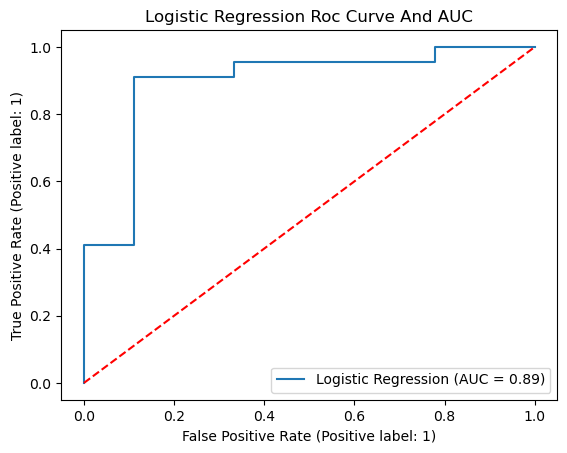

In [131]:
plot_roc_curve(log_reg, X_test, y_test, name = "Logistic Regression")
plt.title("Logistic Regression Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--") #We make the intersection of the graph
plt.show()

#We see that our model is above the red line and has a high AUC value. 

##### HYPERPARAMETER OPTIMIZATION

This method is very useful for small data. 

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
log_reg_new = LogisticRegression()
log_reg_new

LogisticRegression()

In [136]:
parameters = {"penalty":["l1","l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']} 
#These are the parameters that we are curious about

In [135]:
log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)

In [137]:
log_reg_grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [138]:
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l1', 'solver': 'liblinear'}


In [139]:
#We create a new model with the best parameters to see if we get higher accuracy (we don't know yet)
log_reg_new2 = LogisticRegression(penalty = "l1", solver = "saga")
log_reg_new2

LogisticRegression(penalty='l1', solver='saga')

In [140]:
log_reg_new2.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='saga')

In [141]:
y_pred = log_reg_new2.predict(X_test)

In [142]:
print("The test accuracy score of Logistic Regression After hyper-parameter tuning is: {}".format(accuracy_score(y_test, y_pred)))

The test accuracy score of Logistic Regression After hyper-parameter tuning is: 0.8709677419354839


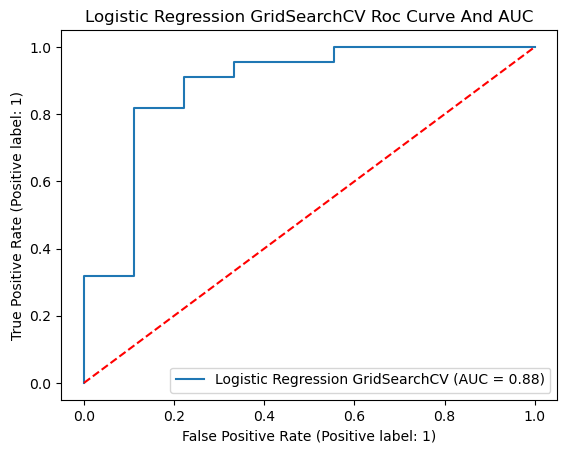

In [143]:
plot_roc_curve(log_reg_new2, X_test, y_test, name = "Logistic Regression GridSearchCV")
plt.title("Logistic Regression GridSearchCV Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

#### 8.4. DECISION TREE

In [149]:
from sklearn.tree import DecisionTreeClassifier

In [150]:
dec_tree = DecisionTreeClassifier(random_state = 5) #We create the model object

In [151]:
dec_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=5)

In [152]:
y_pred = dec_tree.predict(X_test)

In [153]:
print("The test accuracy score of Decision Tree is:", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is: 0.7419354838709677


In [154]:
scores = cross_val_score(dec_tree, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.75


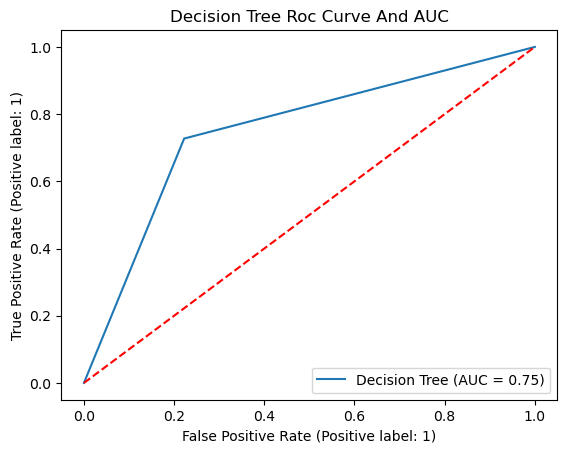

In [155]:
plot_roc_curve(dec_tree, X_test, y_test, name = "Decision Tree")
plt.title("Decision Tree Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

#### 8.5. SUPPORT VECTOR MACHINE ALGORITHM

In [156]:
from sklearn.svm import SVC

In [157]:
svc_model = SVC(random_state = 5)

In [158]:
svc_model.fit(X_train, y_train)

SVC(random_state=5)

In [159]:
y_pred = svc_model.predict(X_test)


In [160]:
print("The test accuracy score of SVM is:", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is: 0.8709677419354839


In [161]:
scores = cross_val_score(svc_model, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

#There is a slight overfitting situation (the cross-validation accuracy is lower than the accuracy score)

Cross-Validation Accuracy Scores 0.8333333333333334


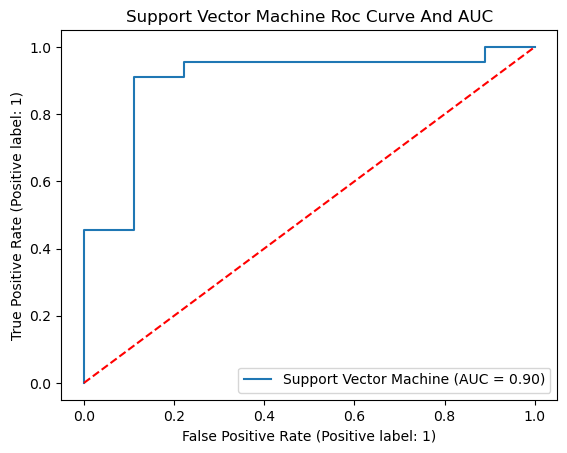

In [162]:
plot_roc_curve(svc_model, X_test, y_test, name = "Support Vector Machine")
plt.title("Support Vector Machine Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

#### 8.6. RANDOM FOREST ALGORITHM

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
random_forest = RandomForestClassifier(random_state = 5)


In [165]:
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=5)

In [166]:
y_pred = random_forest.predict(X_test)


In [167]:
print("The test accuracy score of Random Forest is", accuracy_score(y_test, y_pred))


The test accuracy score of Random Forest is 0.8064516129032258


In [169]:
scores = cross_val_score(random_forest, X_test, y_test, cv = 10) 
print("Cross-Validation Accuracy Scores", scores.mean())

#This is the result of our model with 10 different datasets. This result is higher than the accuracy score, so there is a little 
#bit of underfitting

Cross-Validation Accuracy Scores 0.8999999999999998


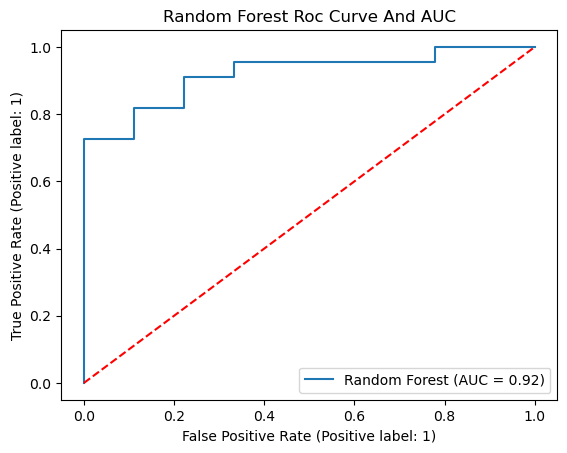

In [171]:
plot_roc_curve(random_forest, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

#An AUC value from 0.9 to 1 can be considered as excellent (like this case, where the AUC is better than in the 
#logistic regression). However, we have to address first the issue of the underfitting. 

##### HIPERPARAMETER OPTIMIZATION

In [172]:
random_forest_new = RandomForestClassifier(random_state = 5)
random_forest_new

RandomForestClassifier(random_state=5)

In [173]:
# n_estimators: number of trees
#criterion: measures the quality in splitting the tree
#max_features

parameters = {"n_estimators" : [50, 100, 150, 200], 
              "criterion" : ["gini", "entropy"], 
              'max_features': ['auto', 'sqrt', 'log2'], 
              'bootstrap': [True, False]}


#We can always increase the number of parameters if we want. 

In [174]:
random_forest_grid = GridSearchCV(random_forest_new, param_grid = parameters)

In [223]:
random_forest_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [233]:
print("Best Parameters:", random_forest_grid.best_params_)


Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 50}


In [238]:
random_forest_new2 = RandomForestClassifier(bootstrap = True, criterion = "entropy", max_features = "auto", n_estimators = 50, random_state = 5)

In [239]:
random_forest_new2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=5)

In [240]:
y_pred = random_forest_new2.predict(X_test)

In [241]:
print("The test accuracy score of Random Forest after hyper-parameter tuning is:", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest after hyper-parameter tuning is: 0.8387096774193549


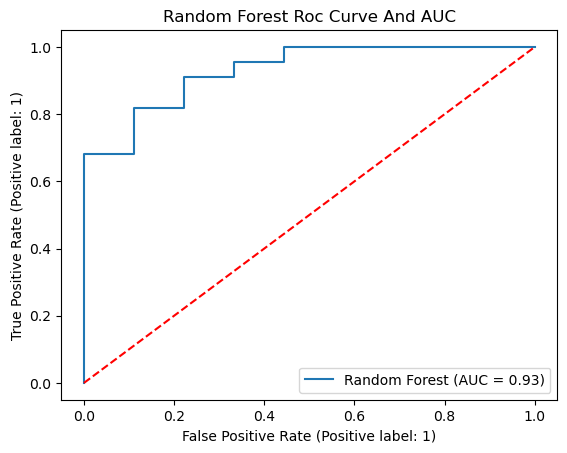

In [242]:
#Grid already does cross validation on itself so it is not necessary to do it


plot_roc_curve(random_forest_new2, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

We obtain the highest AUC value and accuracy with the RANDOM FOREST.

## 8. CONCLUSION

The activities we carried out within the scope of the project are as follows:

Within the scope of the project, we first made the data set ready for Exploratory Data Analysis(EDA)
- We performed Exploratory Data Analysis(EDA).
- We analyzed numerical and categorical variables within the scope of univariate analysis by using Distplot and Pie Chart graphics.
- Within the scope of bivariate analysis, we analyzed the variables among each other using FacetGrid, Count Plot, Pair Plot, Swarm plot, Box plot, and Heatmap graphics.
- We made the data set ready for the model. In this context, we struggled with missing and outlier values.
- We used four different algorithms in the model phase.

We tried different algorithms and the best one (the one with the best accuracy and AUC) was the random forest classifier model. Therefore, we can conclude this project as the one that gives better results. 
